In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import random
from wordcloud import WordCloud



In [2]:
tracks = pd.read_csv('tracks_final.csv')
tracks.drop_duplicates(subset='track_id', inplace=True)

tracks


id      emotions                               track  \
0       4710  anticipation  Waving My Arms In The Air [Take 1]   
1      14603  anticipation                             Uni Iso   
2      19756  anticipation                            red moon   
3       2940  anticipation          Nobody Loves You Like I Do   
4       4067  anticipation                        Harem Scarem   
...      ...           ...                                 ...   
12985  11379          love          Hunger For The Great Light   
12986  14011          love         I Love You so Much It Hurts   
12987  14450          love            The Closing of the Doors   
12988  17337          love                          Silent Cry   
12989   3385          love                  Sleep To Dream Her   

                   artist                                               tags  \
0             Syd Barrett  ['ominous' 'fractured' 'insular' 'wry' 'eccent...   
1               Alva Noto                             ['intimate' 'nervous']   
2                Kalafina      ['dramatic' 'spiritual' 'yearning' 'anxious']   
3                  MakTub                      ['harsh' 'urgent' 'yearning']   
4                   Focus    ['manic' 'eerie' 'urgent' 'campy' 'passionate']   
...                   ...                                                ...   
12985  Dave Matthews Band  ['nocturnal' 'ambitious' 'carefree' 'freewheel...   
12986         Ray Charles  ['gentle' 'lush' 'playful' 'passionate' 'sensu...   
12987       Róisín Murphy  ['intimate' 'lush' 'stylish' 'playful' 'sensua...   
12988              Feeder  ['soothing' 'passionate' 'reflective' 'powerfu...   
12989  Dave Matthews Band  ['intense' 'nocturnal' 'relaxed' 'ambitious' '...   

        arousal  dominance                track_id              genre  \
0      3.620607   4.231495  0pMOAZz9GxlXi2fXkRr0nN   psychedelic rock   
1      5.850000   5.533333  158gPbiLX3MUEptQOJgQES             glitch   
2      4.597881   4.549661  7FH8PR1dYdBm0pT1FIeI7o              j-pop   
3      3.976000   4.889000  6C7NKesRR4mN3Dr4goQHlh  singer-songwriter   
4      4.432000   3.902000  0QhfAl5OwRfnBfqLlV3b6N   progressive rock   
...         ...        ...                     ...                ...   
12985  4.018125   5.930000  2CqxMRNufuvCcraGit5Q2m               rock   
12986  4.216378   5.779331  03BwJtnWJj6WFps8aBEFLQ               soul   
12987  4.150000   5.922007  4nAJ7rNmLIqSz9sd1Uua02              piano   
12988  4.654326   6.402057  1xo2vBELyICpeBNhCz0RU1               rock   
12989  4.055202   5.872110  703JPyDs0KQGmZ2J5tG7Lw               rock   

       acousticness  ...  energy  instrumentalness  key  liveness  loudness  \
0          0.793000  ...  0.1200          0.000000    2    0.1490   -17.179   
1          0.000015  ...  0.3390          0.910000    4    0.0513   -17.213   
2          0.086000  ...  0.5760          0.000000    2    0.0862    -6.782   
3          0.030000  ...  0.4310          0.000006    5    0.1520    -8.650   
4          0.022800  ...  0.8040          0.865000    5    0.1140    -9.591   
...             ...  ...     ...               ...  ...       ...       ...   
12985      0.104000  ...  0.7050          0.000008    0    0.2930    -6.113   
12986      0.940000  ...  0.1840          0.000005    2    0.3290   -16.608   
12987      0.984000  ...  0.0642          0.000006    3    0.1440   -14.807   
12988      0.003550  ...  0.8730          0.000319   10    0.1250    -4.108   
12989      0.046500  ...  0.6110          0.000997    9    0.1240    -7.322   

       mode  speechiness    tempo  time_signature  valence  
0         1       0.0430  105.726               4   0.4620  
1         1       0.0528  127.642               4   0.0567  
2         0       0.0378  166.013               3   0.0921  
3         1       0.0279  111.080               4   0.5050  
4         1       0.0342   88.484               4   0.6940  
...     ...          ...      ...             ...      ...  
129

In [3]:
#Find null values in the dataset
pd.isnull(tracks).sum()

id                    0
emotions              0
track                 0
artist                0
tags                  0
arousal               0
dominance             0
track_id              0
genre               522
acousticness          0
danceability          0
energy                0
instrumentalness      0
key                   0
liveness              0
loudness              0
mode                  0
speechiness           0
tempo                 0
time_signature        0
valence               0
dtype: int64

In [4]:
#Percentage of missing values in Genre
MissingGenre = len(tracks[tracks["genre"].isnull()])/len(tracks)
print(f"{MissingGenre:.2%}")
#Remove rows with missing values
tracks.dropna(subset=['genre'], inplace=True)
tracks

4.02%


id      emotions                               track  \
0       4710  anticipation  Waving My Arms In The Air [Take 1]   
1      14603  anticipation                             Uni Iso   
2      19756  anticipation                            red moon   
3       2940  anticipation          Nobody Loves You Like I Do   
4       4067  anticipation                        Harem Scarem   
...      ...           ...                                 ...   
12985  11379          love          Hunger For The Great Light   
12986  14011          love         I Love You so Much It Hurts   
12987  14450          love            The Closing of the Doors   
12988  17337          love                          Silent Cry   
12989   3385          love                  Sleep To Dream Her   

                   artist                                               tags  \
0             Syd Barrett  ['ominous' 'fractured' 'insular' 'wry' 'eccent...   
1               Alva Noto                             ['intimate' 'nervous']   
2                Kalafina      ['dramatic' 'spiritual' 'yearning' 'anxious']   
3                  MakTub                      ['harsh' 'urgent' 'yearning']   
4                   Focus    ['manic' 'eerie' 'urgent' 'campy' 'passionate']   
...                   ...                                                ...   
12985  Dave Matthews Band  ['nocturnal' 'ambitious' 'carefree' 'freewheel...   
12986         Ray Charles  ['gentle' 'lush' 'playful' 'passionate' 'sensu...   
12987       Róisín Murphy  ['intimate' 'lush' 'stylish' 'playful' 'sensua...   
12988              Feeder  ['soothing' 'passionate' 'reflective' 'powerfu...   
12989  Dave Matthews Band  ['intense' 'nocturnal' 'relaxed' 'ambitious' '...   

        arousal  dominance                track_id              genre  \
0      3.620607   4.231495  0pMOAZz9GxlXi2fXkRr0nN   psychedelic rock   
1      5.850000   5.533333  158gPbiLX3MUEptQOJgQES             glitch   
2      4.597881   4.549661  7FH8PR1dYdBm0pT1FIeI7o              j-pop   
3      3.976000   4.889000  6C7NKesRR4mN3Dr4goQHlh  singer-songwriter   
4      4.432000   3.902000  0QhfAl5OwRfnBfqLlV3b6N   progressive rock   
...         ...        ...                     ...                ...   
12985  4.018125   5.930000  2CqxMRNufuvCcraGit5Q2m               rock   
12986  4.216378   5.779331  03BwJtnWJj6WFps8aBEFLQ               soul   
12987  4.150000   5.922007  4nAJ7rNmLIqSz9sd1Uua02              piano   
12988  4.654326   6.402057  1xo2vBELyICpeBNhCz0RU1               rock   
12989  4.055202   5.872110  703JPyDs0KQGmZ2J5tG7Lw               rock   

       acousticness  ...  energy  instrumentalness  key  liveness  loudness  \
0          0.793000  ...  0.1200          0.000000    2    0.1490   -17.179   
1          0.000015  ...  0.3390          0.910000    4    0.0513   -17.213   
2          0.086000  ...  0.5760          0.000000    2    0.0862    -6.782   
3          0.030000  ...  0.4310          0.000006    5    0.1520    -8.650   
4          0.022800  ...  0.8040          0.865000    5    0.1140    -9.591   
...             ...  ...     ...               ...  ...       ...       ...   
12985      0.104000  ...  0.7050          0.000008    0    0.2930    -6.113   
12986      0.940000  ...  0.1840          0.000005    2    0.3290   -16.608   
12987      0.984000  ...  0.0642          0.000006    3    0.1440   -14.807   
12988      0.003550  ...  0.8730          0.000319   10    0.1250    -4.108   
12989      0.046500  ...  0.6110          0.000997    9    0.1240    -7.322   

       mode  speechiness    tempo  time_signature  valence  
0         1       0.0430  105.726               4   0.4620  
1         1       0.0528  127.642               4   0.0567  
2         0       0.0378  166.013               3   0.0921  
3         1       0.0279  111.080               4   0.5050  
4         1       0.0342   88.484               4   0.6940  
...     ...          ...      ...             ...      ...  
129

In [5]:
#drop columns that are not needed
col_to_drop = ['id','key', 'mode', 'time_signature']
tracks.drop(col_to_drop, axis=1, inplace=True)


In [6]:
#describe the dataset
tracks.describe().transpose()

count        mean        std        min        25%  \
arousal           12468.0    4.112214   1.108796   0.278333   3.349877   
dominance         12468.0    5.248808   1.125780   0.578421   4.590000   
acousticness      12468.0    0.358127   0.354327   0.000001   0.021000   
danceability      12468.0    0.498958   0.174794   0.000000   0.379000   
energy            12468.0    0.564160   0.266010   0.000020   0.352000   
instrumentalness  12468.0    0.226808   0.340206   0.000000   0.000013   
liveness          12468.0    0.198976   0.173300   0.000000   0.098400   
loudness          12468.0  -10.048373   5.144795 -45.138000 -12.672000   
speechiness       12468.0    0.075418   0.106632   0.000000   0.032600   
tempo             12468.0  120.219123  30.248515   0.000000  96.976250   
valence           12468.0    0.412424   0.263008   0.000000   0.186000   

                         50%         75%         max  
arousal             4.105380    4.860000    6.785000  
dominance           5.445000    6.118185    7.229206  
acousticness        0.221000    0.709000    0.996000  
danceability        0.506000    0.623000    0.982000  
energy              0.579000    0.796000    1.000000  
instrumentalness    0.005405    0.441000    0.995000  
liveness            0.124000    0.243000    0.995000  
loudness           -9.025000   -6.352750    4.140000  
speechiness         0.041100    0.064900    0.966000  
tempo             119.633500  139.722000  219.338000  
valence             0.377000    0.621250    0.985000

C:\Users\Esraa\AppData\Local\Temp/ipykernel_19748/1472560236.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = tracks.corr(method='pearson')


[Text(0.5, 0, 'arousal'),
 Text(1.5, 0, 'dominance'),
 Text(2.5, 0, 'acousticness'),
 Text(3.5, 0, 'danceability'),
 Text(4.5, 0, 'energy'),
 Text(5.5, 0, 'instrumentalness'),
 Text(6.5, 0, 'liveness'),
 Text(7.5, 0, 'loudness'),
 Text(8.5, 0, 'speechiness'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'valence')]

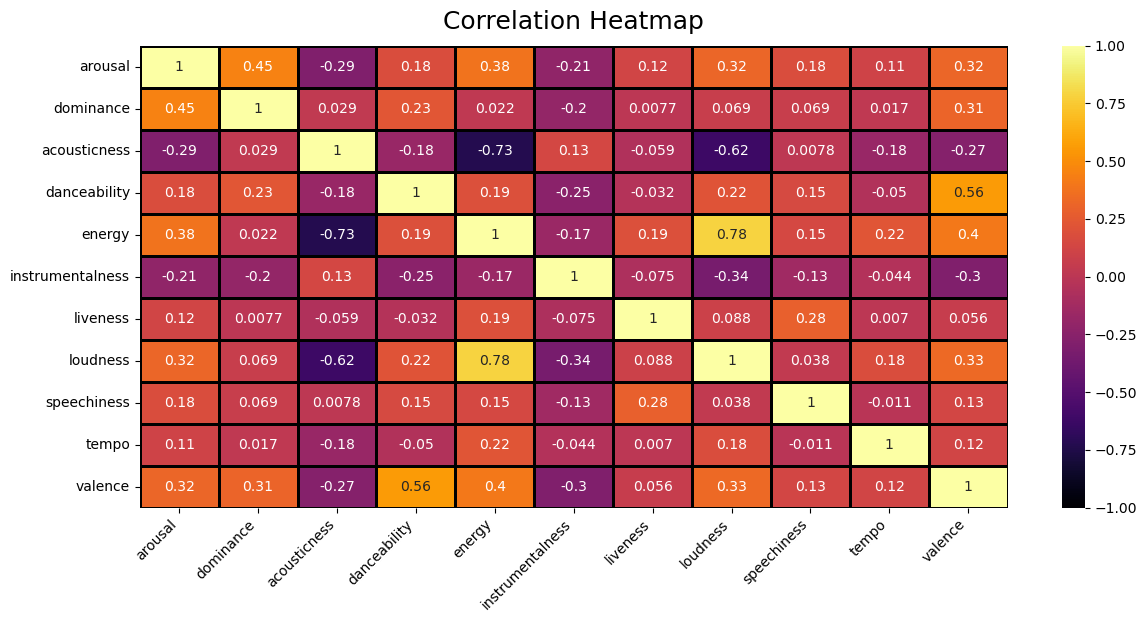

In [7]:
#plot correlation matrix
corr_df = tracks.corr(method='pearson')
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(corr_df, annot=True, vmin=-1, vmax=1, center=0, linewidths=1, linecolor='black', cmap='inferno')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

In [8]:
#count of tracks per genre
Genra_counts = tracks['genre'].value_counts()

#percentage of genres with less than 100 tracks
print(f"{len(Genra_counts[Genra_counts<10])/len(Genra_counts):.2%} of the genres have less than 10 tracks")
tracks_percentage = len(tracks[tracks["genre"].isin(Genra_counts[Genra_counts < 10].index)])/len(tracks)
print(f"{tracks_percentage: .2%} of tracks are in genres with less than 10 tracks")
#exclude genres with less than 10 tracks
modified_tracks_genre = tracks[~tracks['genre'].isin(Genra_counts[Genra_counts < 10].index)]


67.98% of the genres have less than 10 tracks
 5.71% of tracks are in genres with less than 10 tracks


Text(0.5, 1.0, 'Distribution of Tracks per Genre')

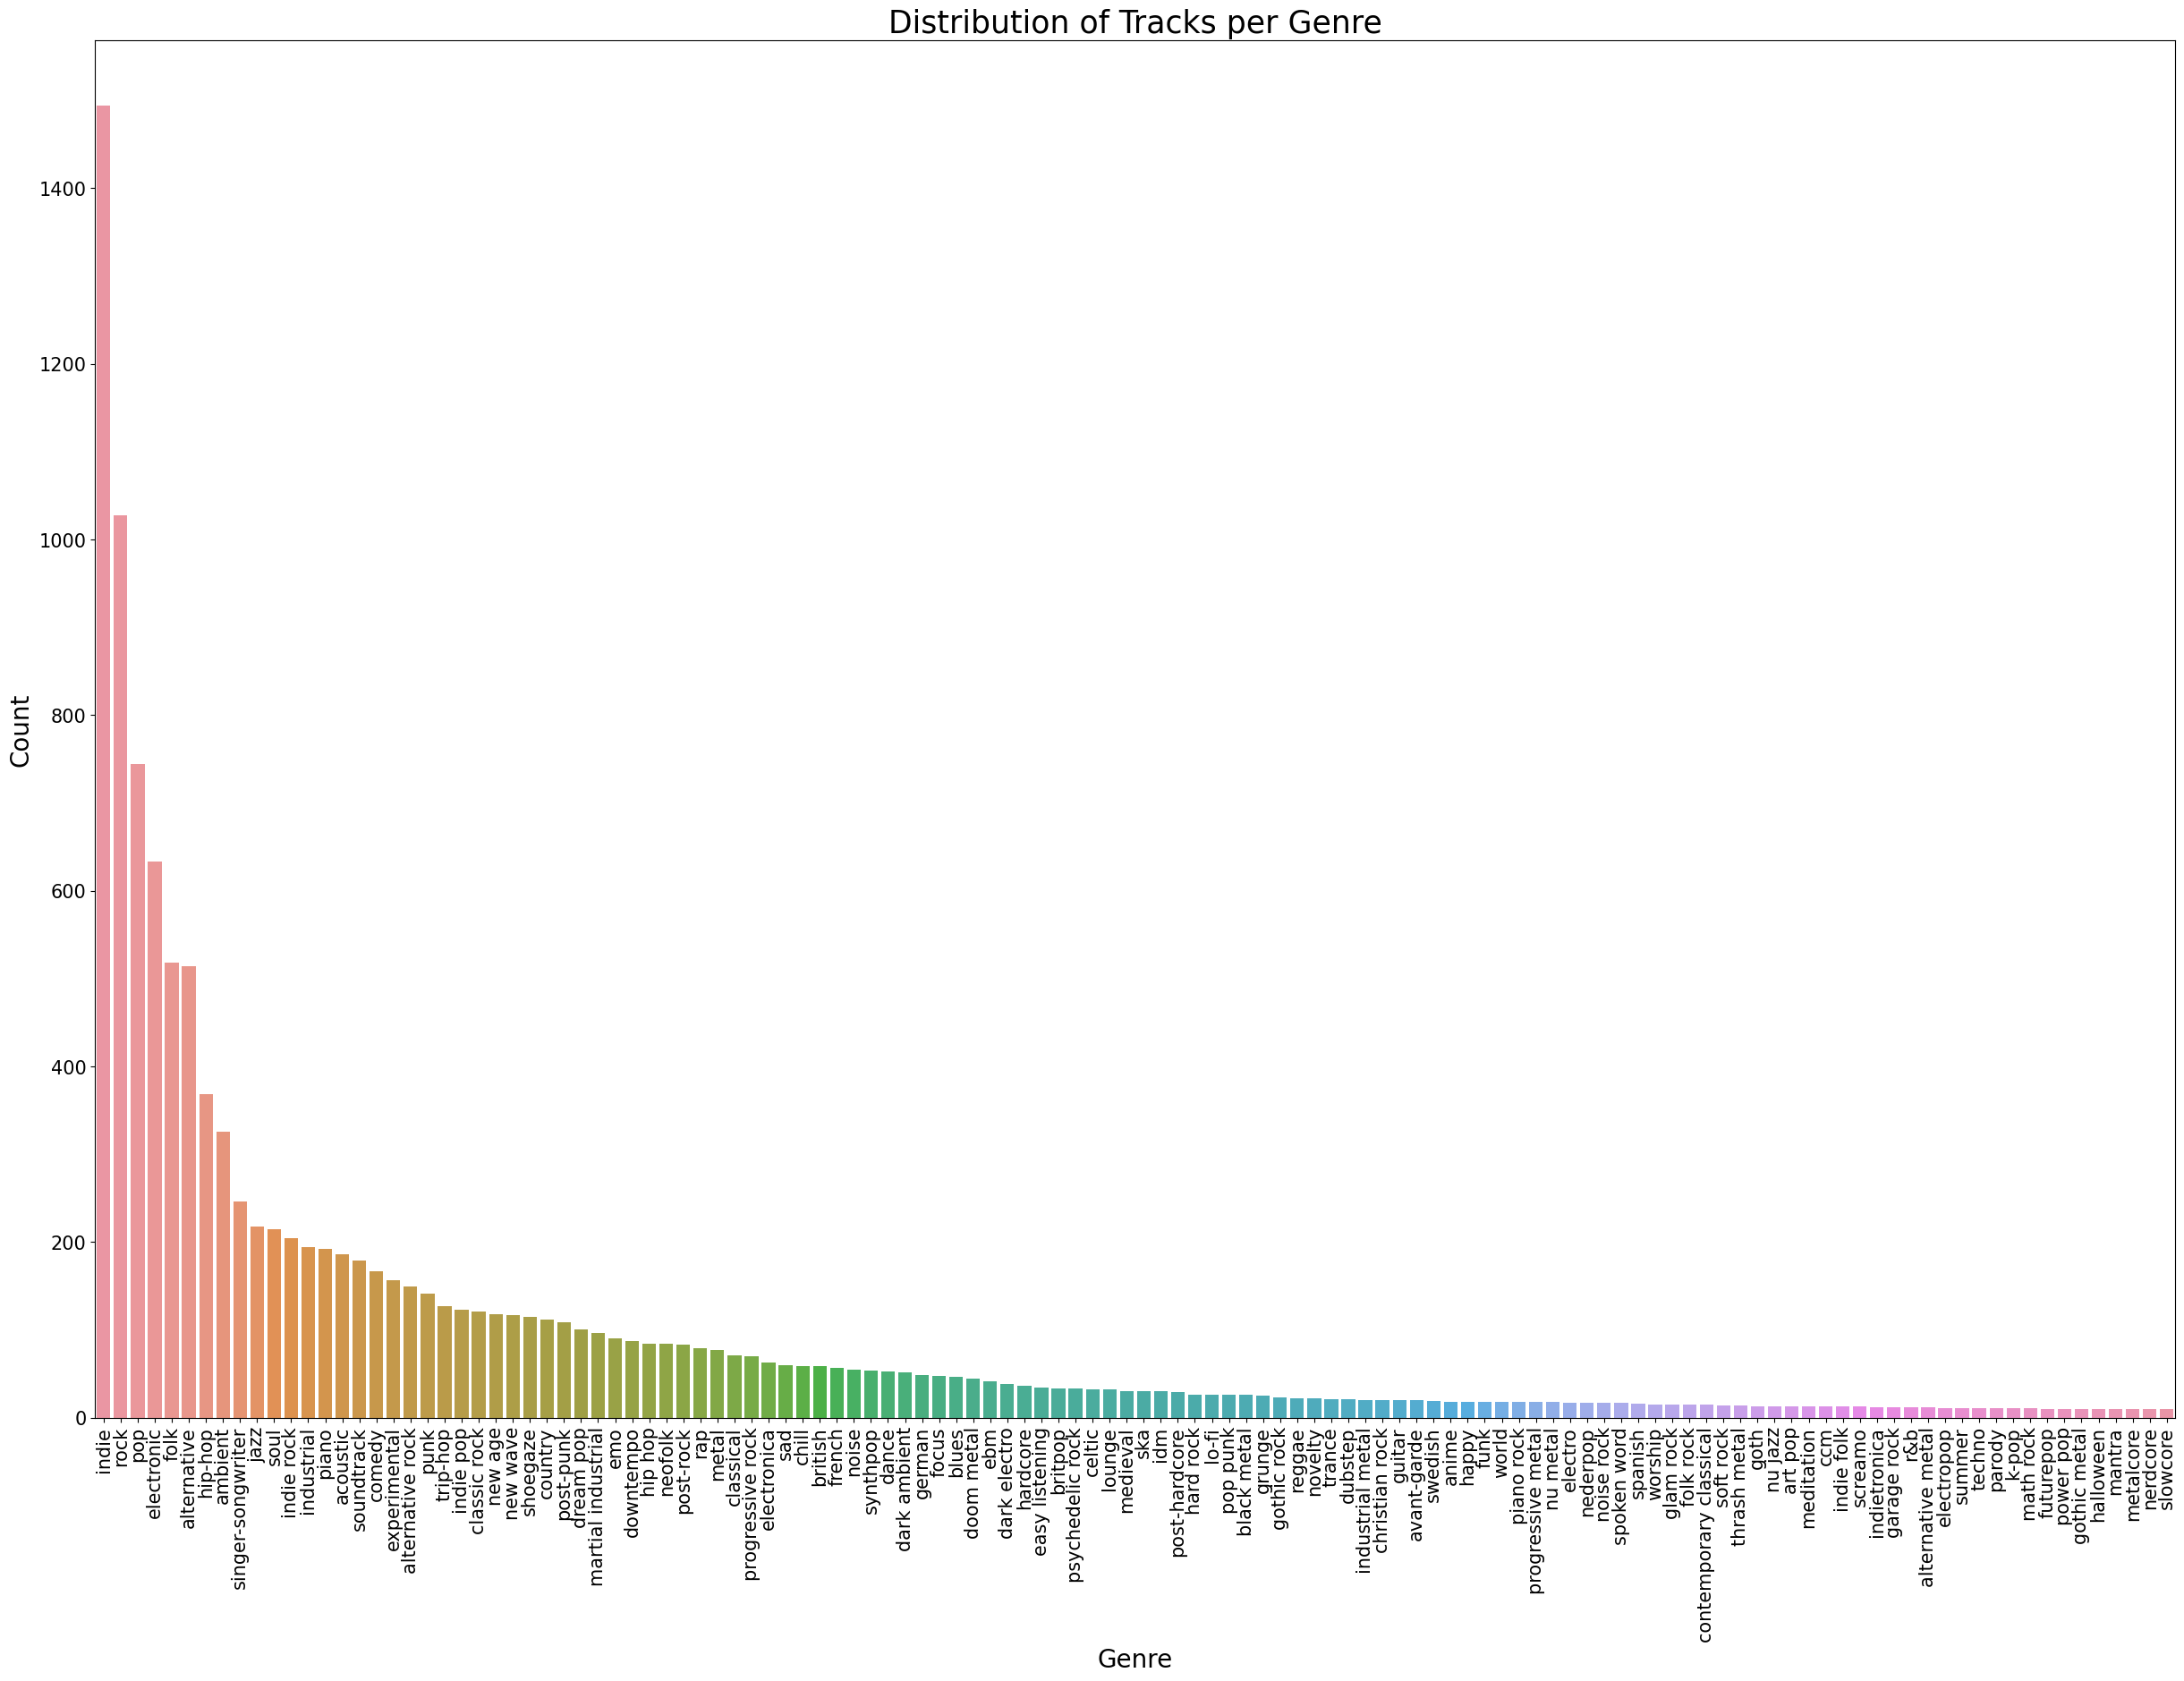

In [9]:
#plot distribution of tracks per genre
modified_tracks_genre.groupby('genre').count()['track_id'].sort_values(ascending=False)

plt.figure(figsize=(30,20))
sorted_genre_counts = modified_tracks_genre.groupby('genre').count()['track_id'].reset_index(name='count').sort_values('count', ascending=False)
sns.barplot(x='genre', y='count', data=sorted_genre_counts, order=sorted_genre_counts['genre'])
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Genre', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Distribution of Tracks per Genre', fontsize=25)


C:\Users\Esraa\AppData\Local\Temp/ipykernel_19748/1626605201.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modified_tracks_genre[i])
C:\Users\Esraa\AppData\Local\Temp/ipykernel_19748/1626605201.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modified_tracks_genre[i])
C:\Users\Esraa\App

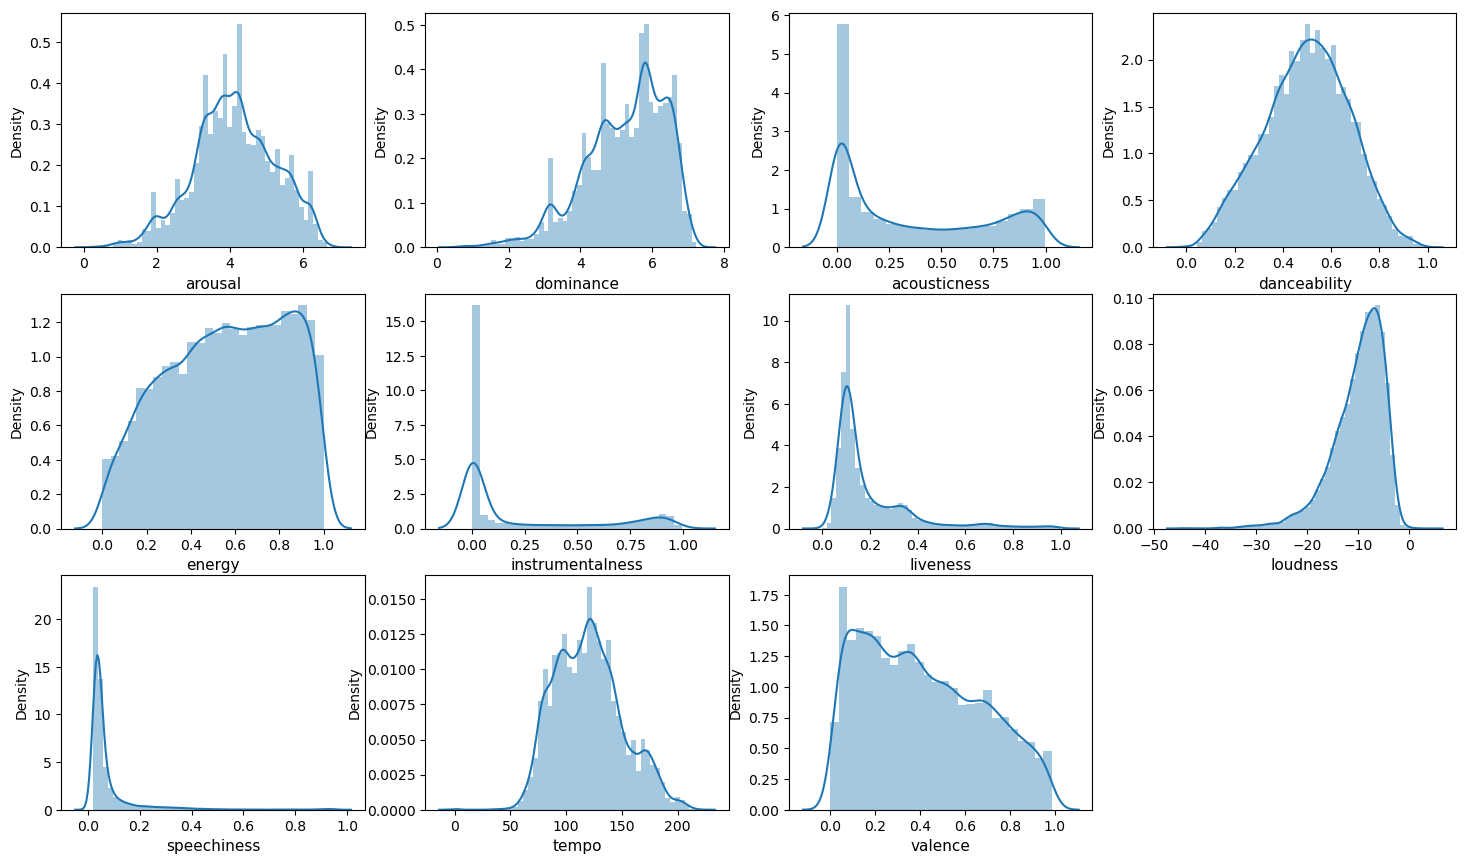

In [10]:
#distribution of values over features in a dataset. Discovering patterns, trends, and outliers in the data by showing the distribution of values in each feature.
k=0
features = ['arousal', 'dominance', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
plt.figure(figsize = (18,14))
for i in features:
    plt.subplot(4,4, k + 1)
    sns.distplot(modified_tracks_genre[i])
    plt.xlabel(i, fontsize=11)
    k +=1

In [11]:
#count of tracks by cluster "emotion"
Emotion_counts = tracks['emotions'].value_counts()

#exclude emotions with less than 100 tracks
modified_tracks_emotion = tracks[~tracks['emotions'].isin(Emotion_counts[Emotion_counts < 100].index)]


C:\Users\Esraa\AppData\Local\Temp/ipykernel_19748/2766596747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_tracks_emotion['tags'] = modified_tracks_emotion['tags'].apply(lambda x: x.replace("'", ''))
C:\Users\Esraa\AppData\Local\Temp/ipykernel_19748/2766596747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_tracks_emotion['emotions'] = modified_tracks_emotion['emotions'].apply(lambda x: x.upper())


<Figure size 640x480 with 0 Axes>

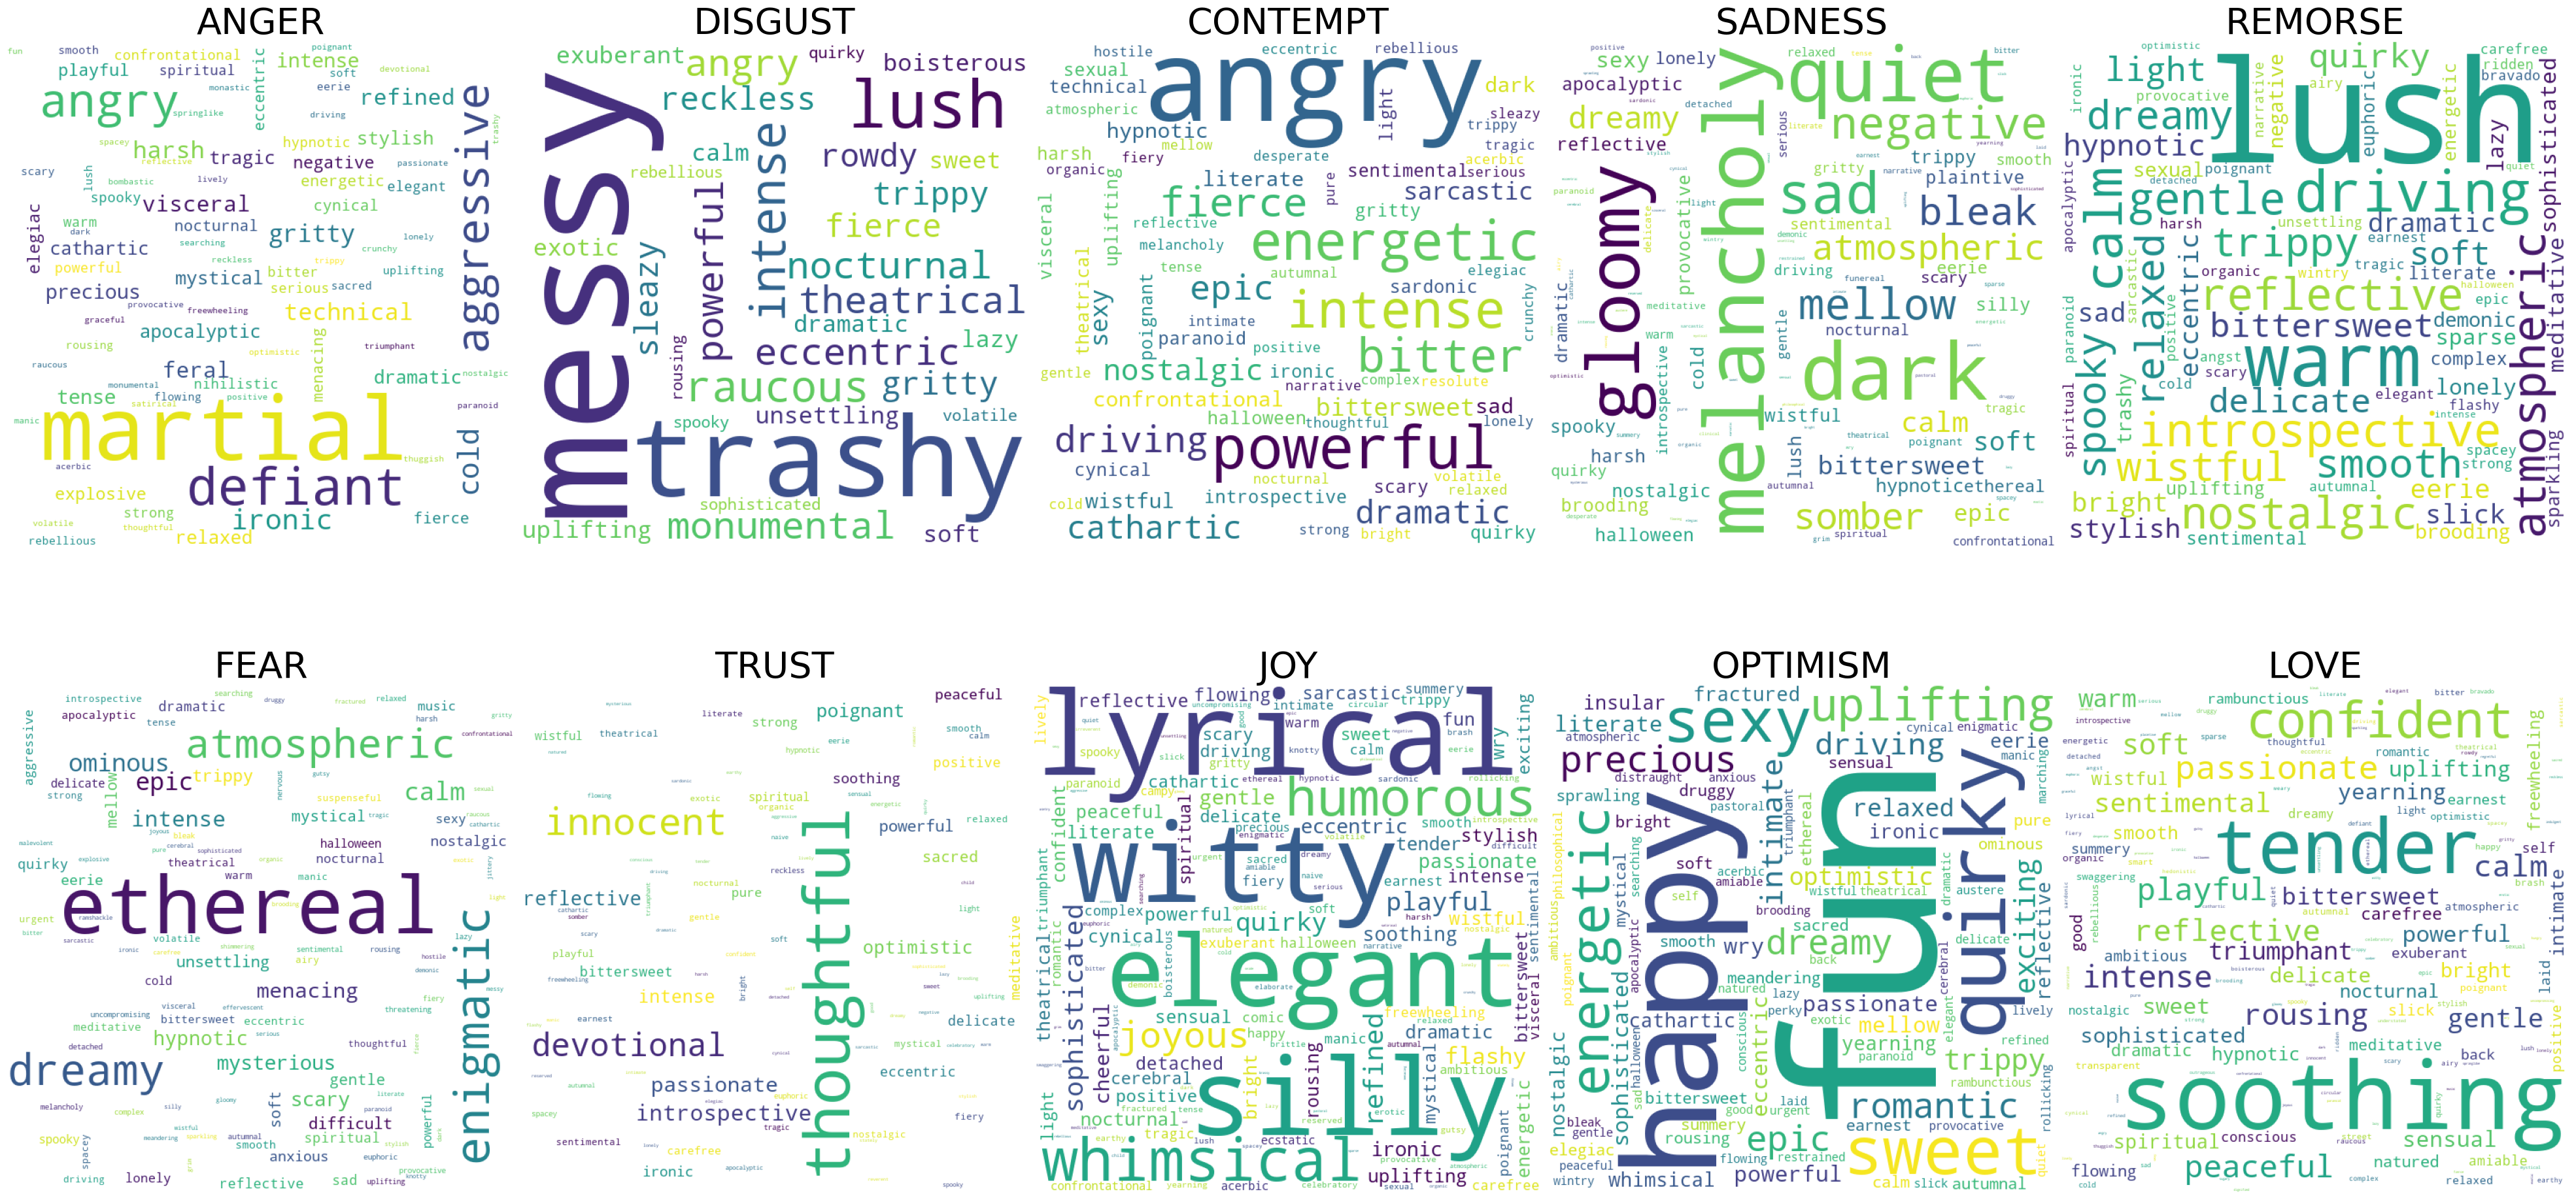

In [12]:
#plot wordcloud for tags per emotion
modified_tracks_emotion['tags'] = modified_tracks_emotion['tags'].apply(lambda x: x.replace("'", ''))
modified_tracks_emotion['emotions'] = modified_tracks_emotion['emotions'].apply(lambda x: x.upper())

plt.figure()
fig, axs = plt.subplots(2,5, figsize=(40, 20), facecolor='w', edgecolor='k', gridspec_kw={'hspace': 0.01, 'wspace': 0.01, 'top': 0.99, 'bottom': 0.01, 'left': 0.01, 'right': 0.99})
axs = axs.ravel()

for i, emotion in enumerate(modified_tracks_emotion.emotions.unique()):
    all_tags = modified_tracks_emotion[modified_tracks_emotion.emotions == emotion]['tags'].tolist()
    random.shuffle(all_tags)
    #Retrieve all tags and store them in a list
    all_tags = ''.join([item for sublist in all_tags for item in sublist])

    #Create a wordcloud
    wordcloud = WordCloud(width=600, height=600, background_color='white', collocations=False).generate(all_tags)
    axs[i].imshow(wordcloud)
    axs[i].axis("off")
    axs[i].set_title(emotion, fontsize=40)

#plt.tight_layout()
plt.show()



In [13]:
#top 5 genres with most tracks
features = ['arousal', 'dominance', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
grouped = modified_tracks_emotion.groupby('genre')[features].mean().reset_index()
count = modified_tracks_emotion.groupby('genre')['track_id'].count().reset_index()
grouped["count"] = count["track_id"]
grouped = grouped.sort_values(by='count', ascending=False).head(5)
grouped


genre   arousal  dominance  acousticness  danceability    energy  \
184       indie  4.066225   5.458386      0.364823      0.491395  0.558454   
304        rock  4.447284   5.393289      0.205663      0.501108  0.669071   
271         pop  4.601021   5.803110      0.283088      0.585168  0.623173   
115  electronic  3.983103   5.073982      0.259882      0.551795  0.608295   
131        folk  3.665555   5.458980      0.649594      0.503651  0.356938   

     instrumentalness  liveness   loudness  speechiness       tempo   valence  \
184          0.181262  0.177421  -9.159846     0.049407  122.680586  0.424565   
304          0.092271  0.211095  -8.085819     0.057595  126.345149  0.480213   
271          0.042473  0.181345  -8.284734     0.056833  121.314392  0.546243   
115          0.407289  0.181078  -9.618413     0.062608  123.286860  0.376687   
131          0.138735  0.176629 -12.579164     0.052062  116.426836  0.398202   

     count  
184   1489  
304   1023  
271    740  
115    629  
131    518

In [14]:
modified_tracks_emotion = modified_tracks_emotion[modified_tracks_emotion['genre'].isin(grouped['genre'].tolist())]
modified_tracks_emotion

emotions                       track                  artist  \
40       ANGER         Little Baby Nothing  Manic Street Preachers   
41       ANGER               Heretic Pride      The Mountain Goats   
42       ANGER       Lovecraft in Brooklyn      The Mountain Goats   
44       ANGER   Michael Myers Resplendent      The Mountain Goats   
45       ANGER             Might Have Been            Kate Voegele   
...        ...                         ...                     ...   
12981     LOVE                    All Eyes          Post War Years   
12982     LOVE                 Sing It Out      Hope of the States   
12985     LOVE  Hunger For The Great Light      Dave Matthews Band   
12988     LOVE                  Silent Cry                  Feeder   
12989     LOVE          Sleep To Dream Her      Dave Matthews Band   

                                                    tags   arousal  dominance  \
40                                     [defiant cynical]  5.004200   5.605800   
41                                             [defiant]  5.350000   5.670000   
42                          [defiant paranoid energetic]  5.221667   4.705000   
44                                             [defiant]  4.355000   6.510000   
45                                   [defiant energetic]  4.920000   6.030000   
...                                                  ...       ...        ...   
12981                [intense passionate powerful fiery]  5.995000   6.257500   
12982    [intense dramatic passionate powerful hypnotic]  5.725000   5.872000   
12985  [nocturnal ambitious carefree freewheeling pla...  4.018125   5.930000   
12988  [soothing passionate reflective powerful stron...  4.654326   6.402057   
12989  [intense nocturnal relaxed ambitious carefree ...  4.055202   5.872110   

                     track_id  genre  acousticness  danceability  energy  \
40     4f3owYynBAy2g3bvs4GPYw   rock      0.000022         0.584   0.568   
41     3LsPToq3yB7g5IKfw829e1   folk      0.003920         0.545   0.811   
42     2yBB2TGwhpd5ci79gfC9Gz  indie      0.000437         0.583   0.792   
44     6jkq6E8KUmzf1QNIzClD7V  indie      0.209000         0.375   0.269   
45     5F0HCvhtUxM39ijkAcxWP6    pop      0.051000         0.692   0.808   
...                       ...    ...           ...           ...     ...   
12981  6278lJd7P5ScjNi0PPiSY3  indie      0.033600         0.443   0.880   
12982  4s6A6rCJ569Ez8HAuZAm2z  indie      0.000014         0.409   0.975   
12985  2CqxMRNufuvCcraGit5Q2m   rock      0.104000         0.583   0.705   
12988  1xo2vBELyICpeBNhCz0RU1   rock      0.003550         0.420   0.873   
12989  703JPyDs0KQGmZ2J5tG7Lw   rock      0.046500         0.540   0.611   

       instrumentalness  liveness  loudness  speechiness    tempo  valence  
40             0.080600    0.3380    -6.462       0.0268  132.912    0.158  
41             0.425000    0.0796    -6.104       0.0321  169.147    0.909  
42             0.669000    0.3070    -7.931       0.0446  149.675    0.770  
44             0.028700    0.1070   -12.520       0.0355  128.821    0.136  
45             0.000000    0.0665    -4.596       0.0411  119.982    0.905  
...                 ...       ...       ...          ...      ...      ...  
12981          0.000124    0.3380    -7.890       0.0494   89.000    0.222  
12982          0.014300    0.2730    -2.899       0.0611  135.862    0.426  
12985          0.000008    0.2930    -6.113       0.0496  119.973    0.149  
12988          0.000319    0.1250    -4.108       0.0471  107.990    0.265  
12989          0.000997    0.1240    -7.322       0.0258  140.160    0.235  

[4399 rows x 17 columns]

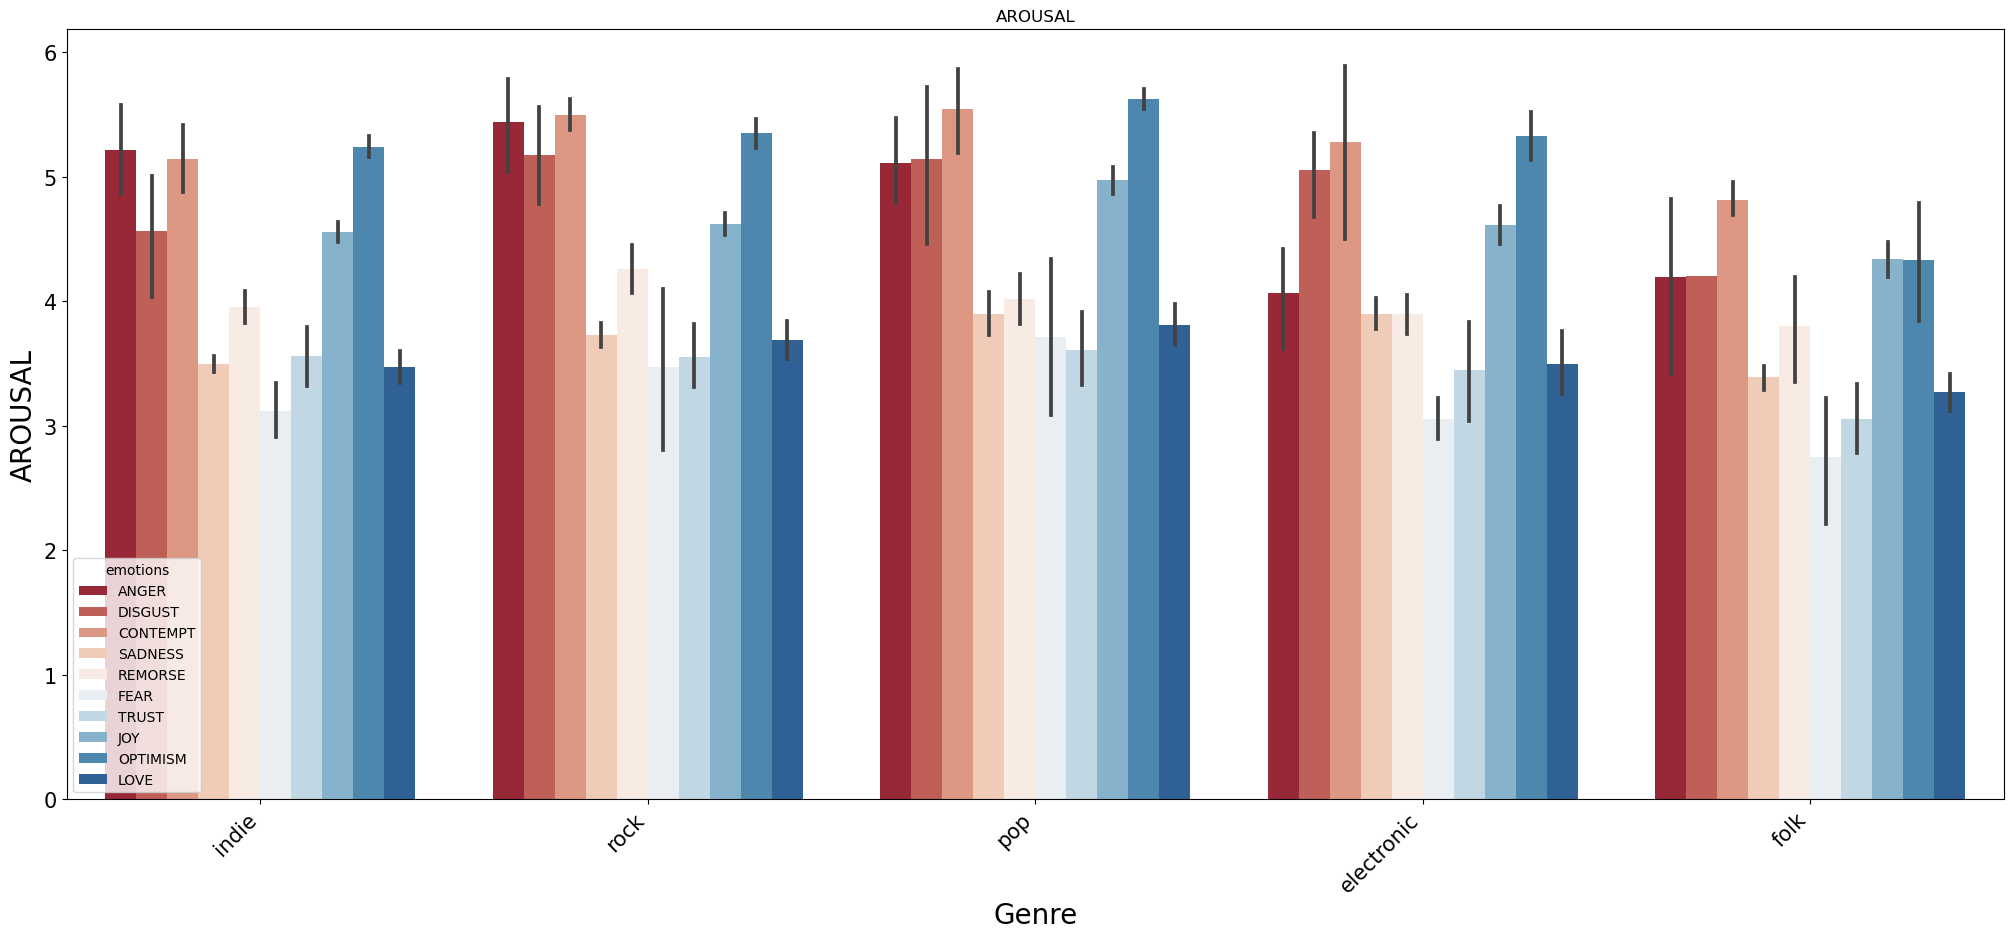

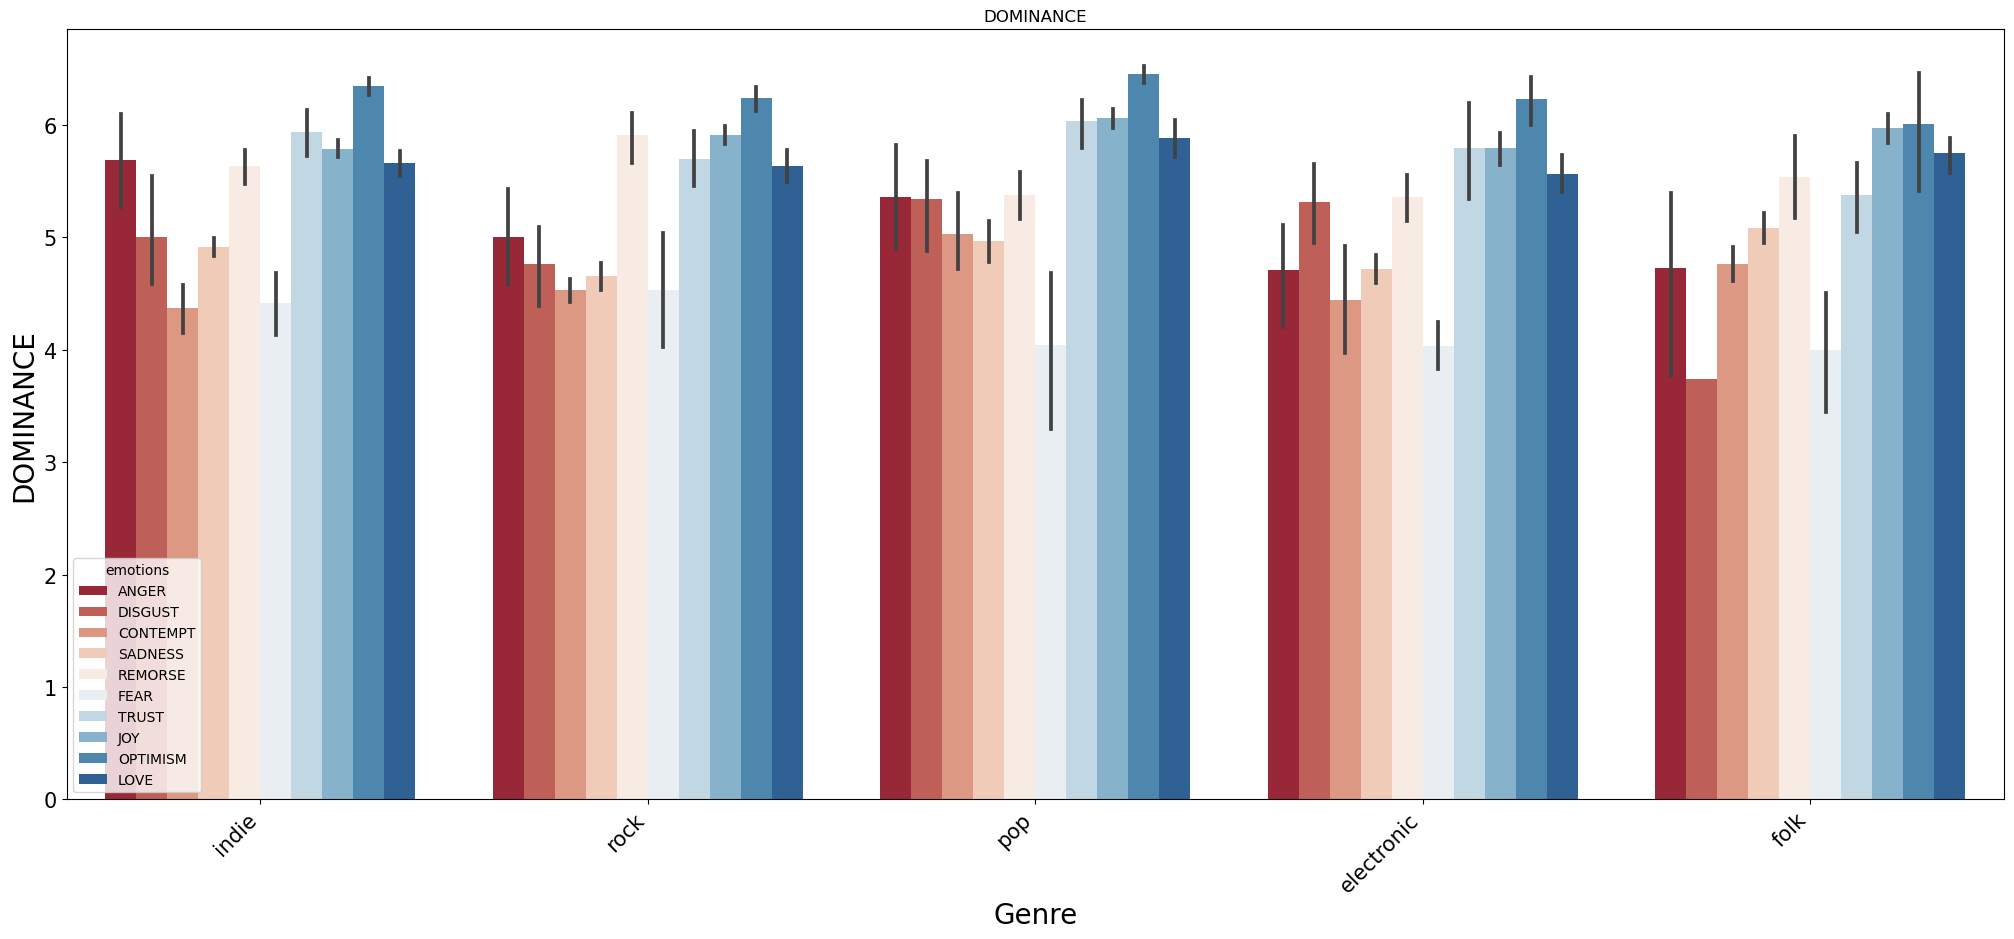

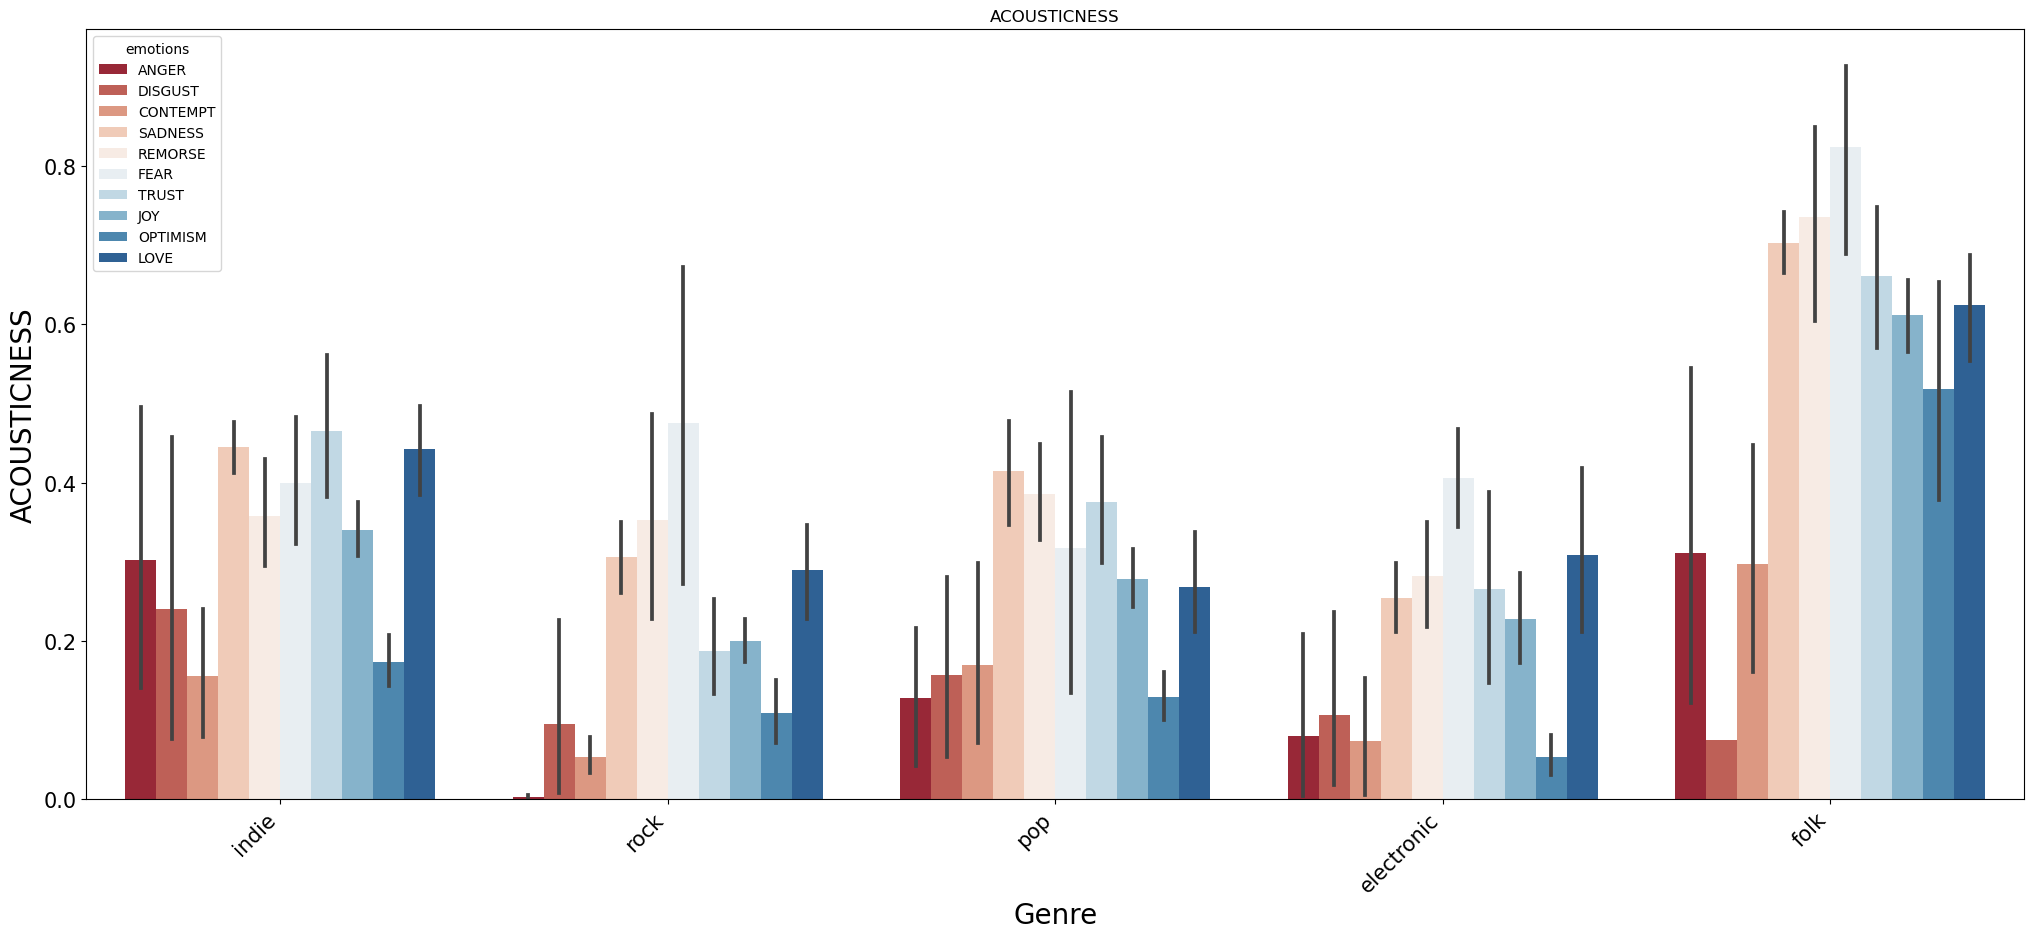

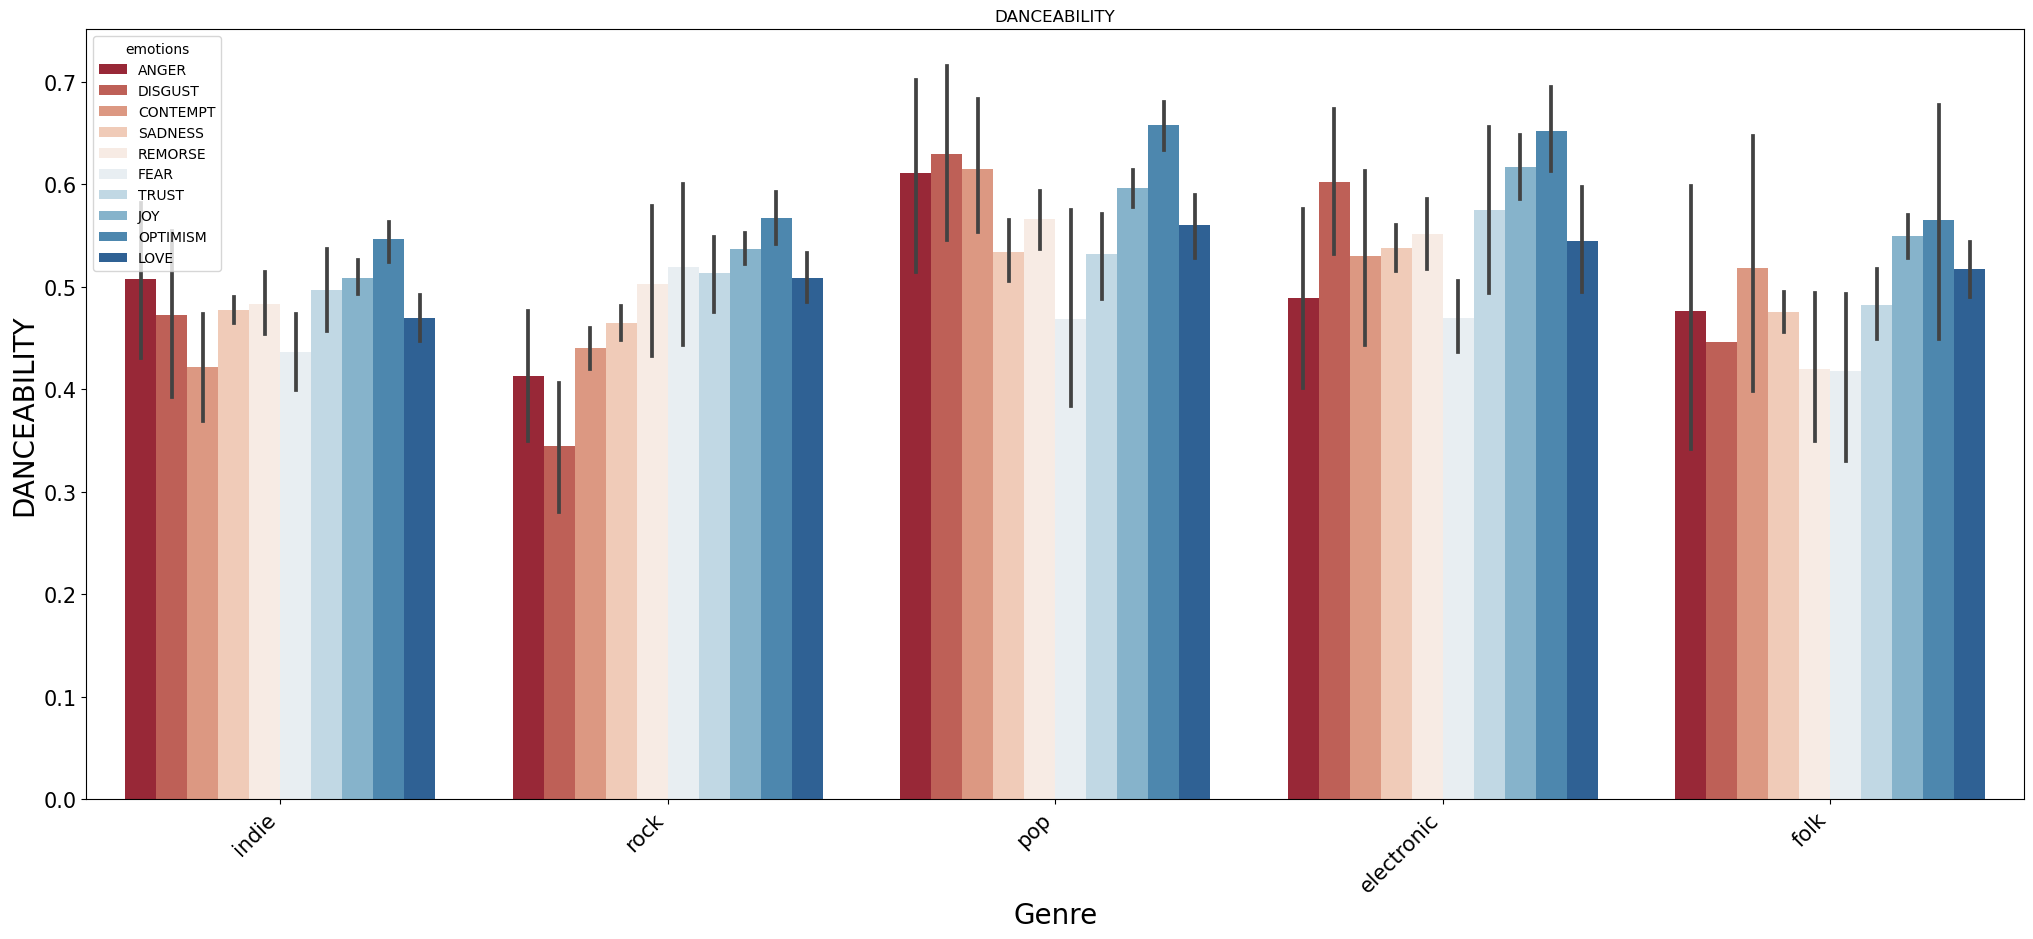

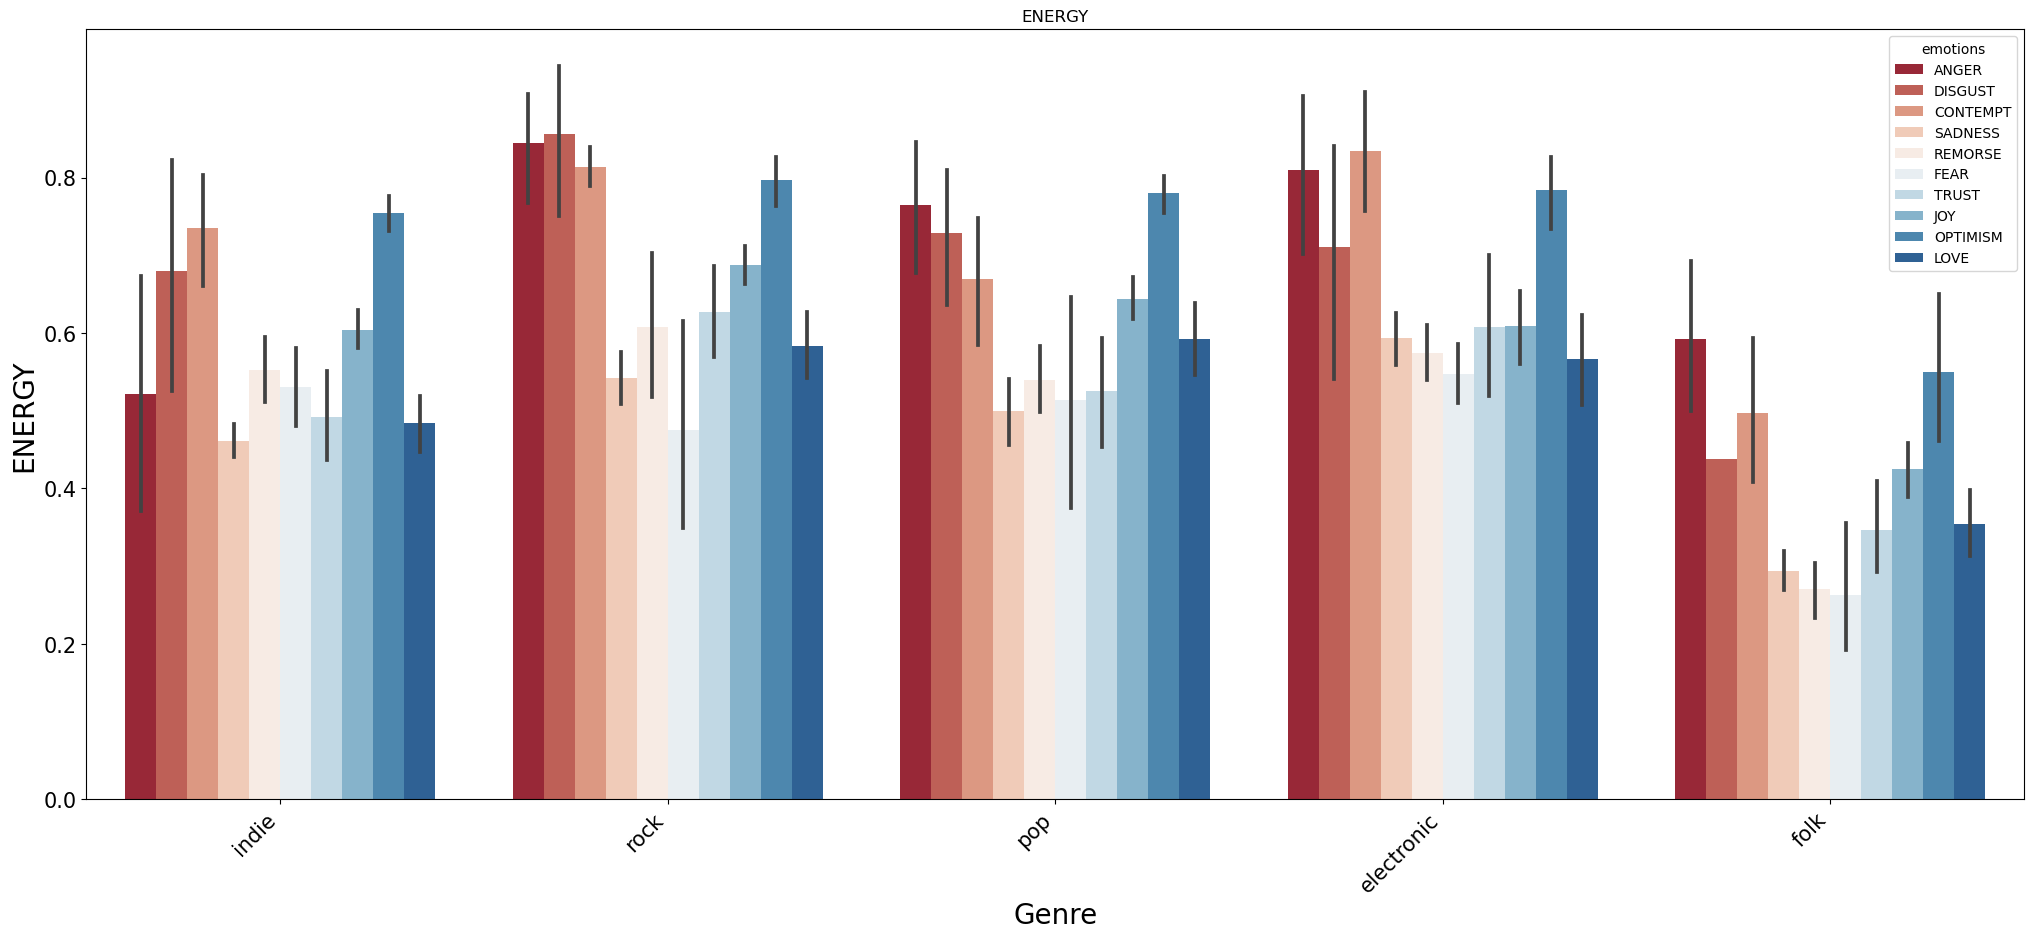

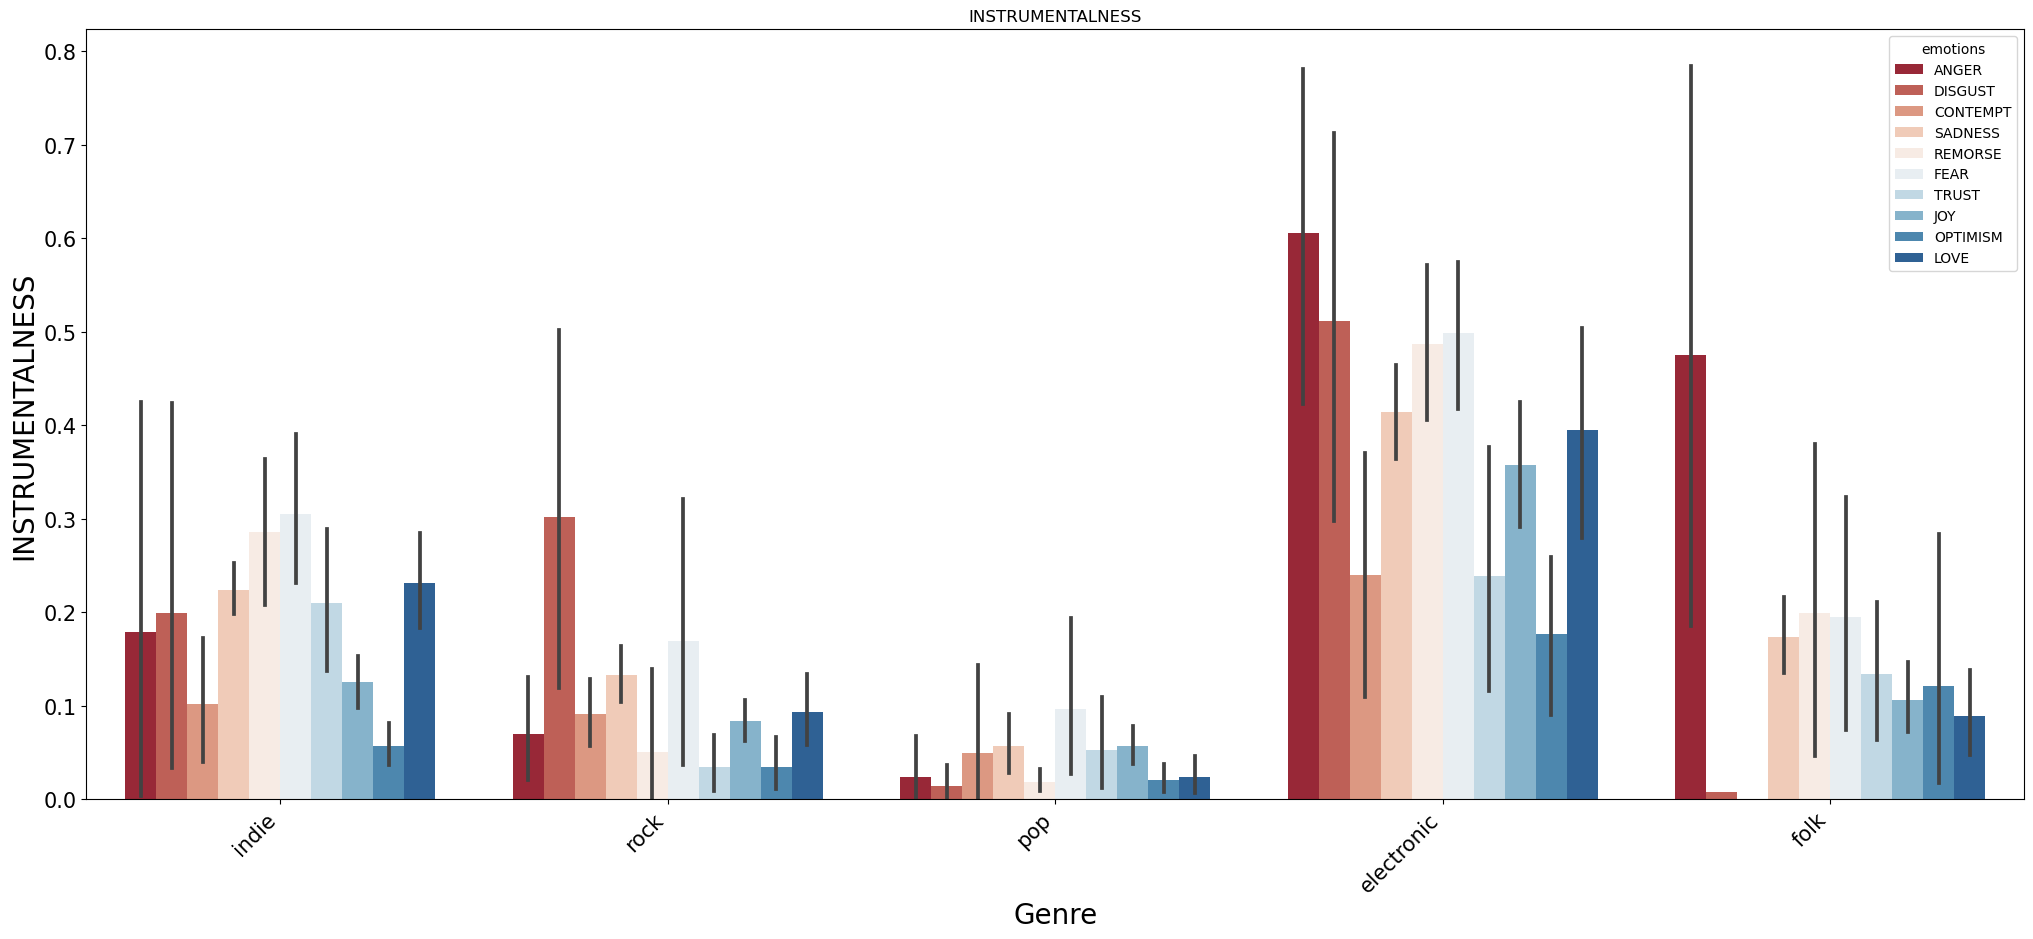

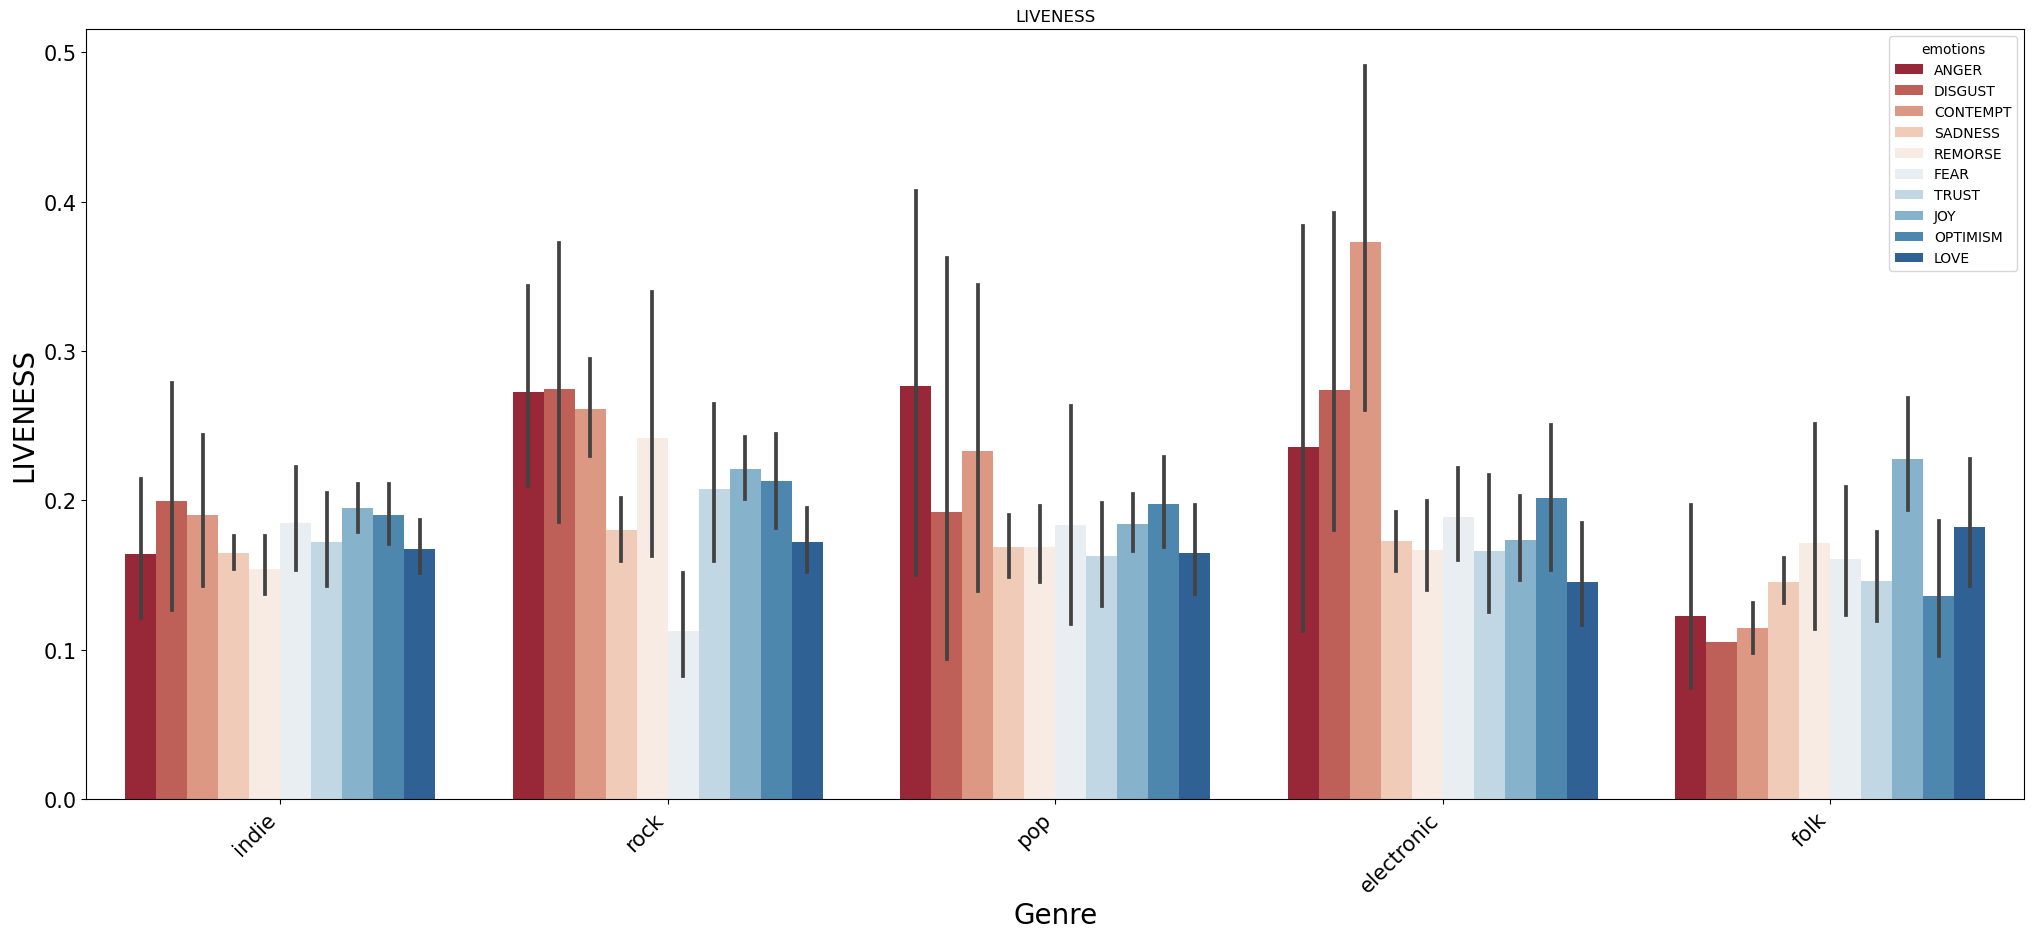

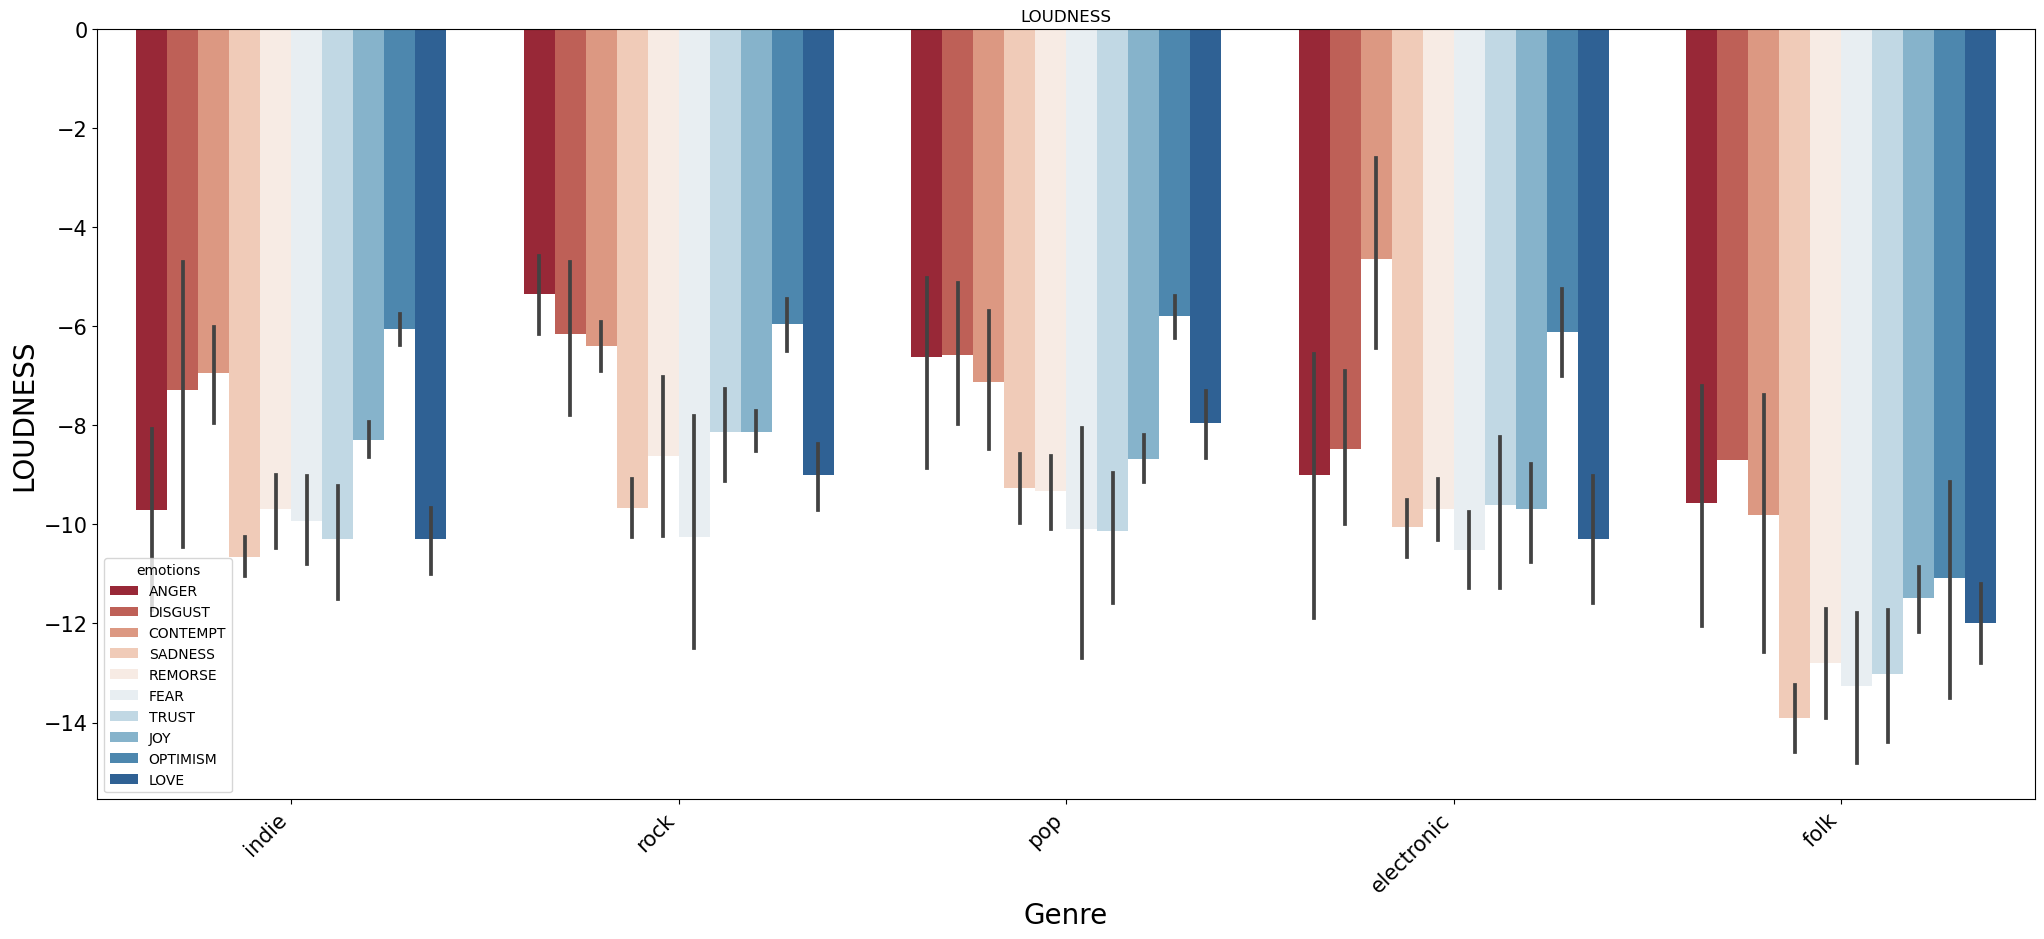

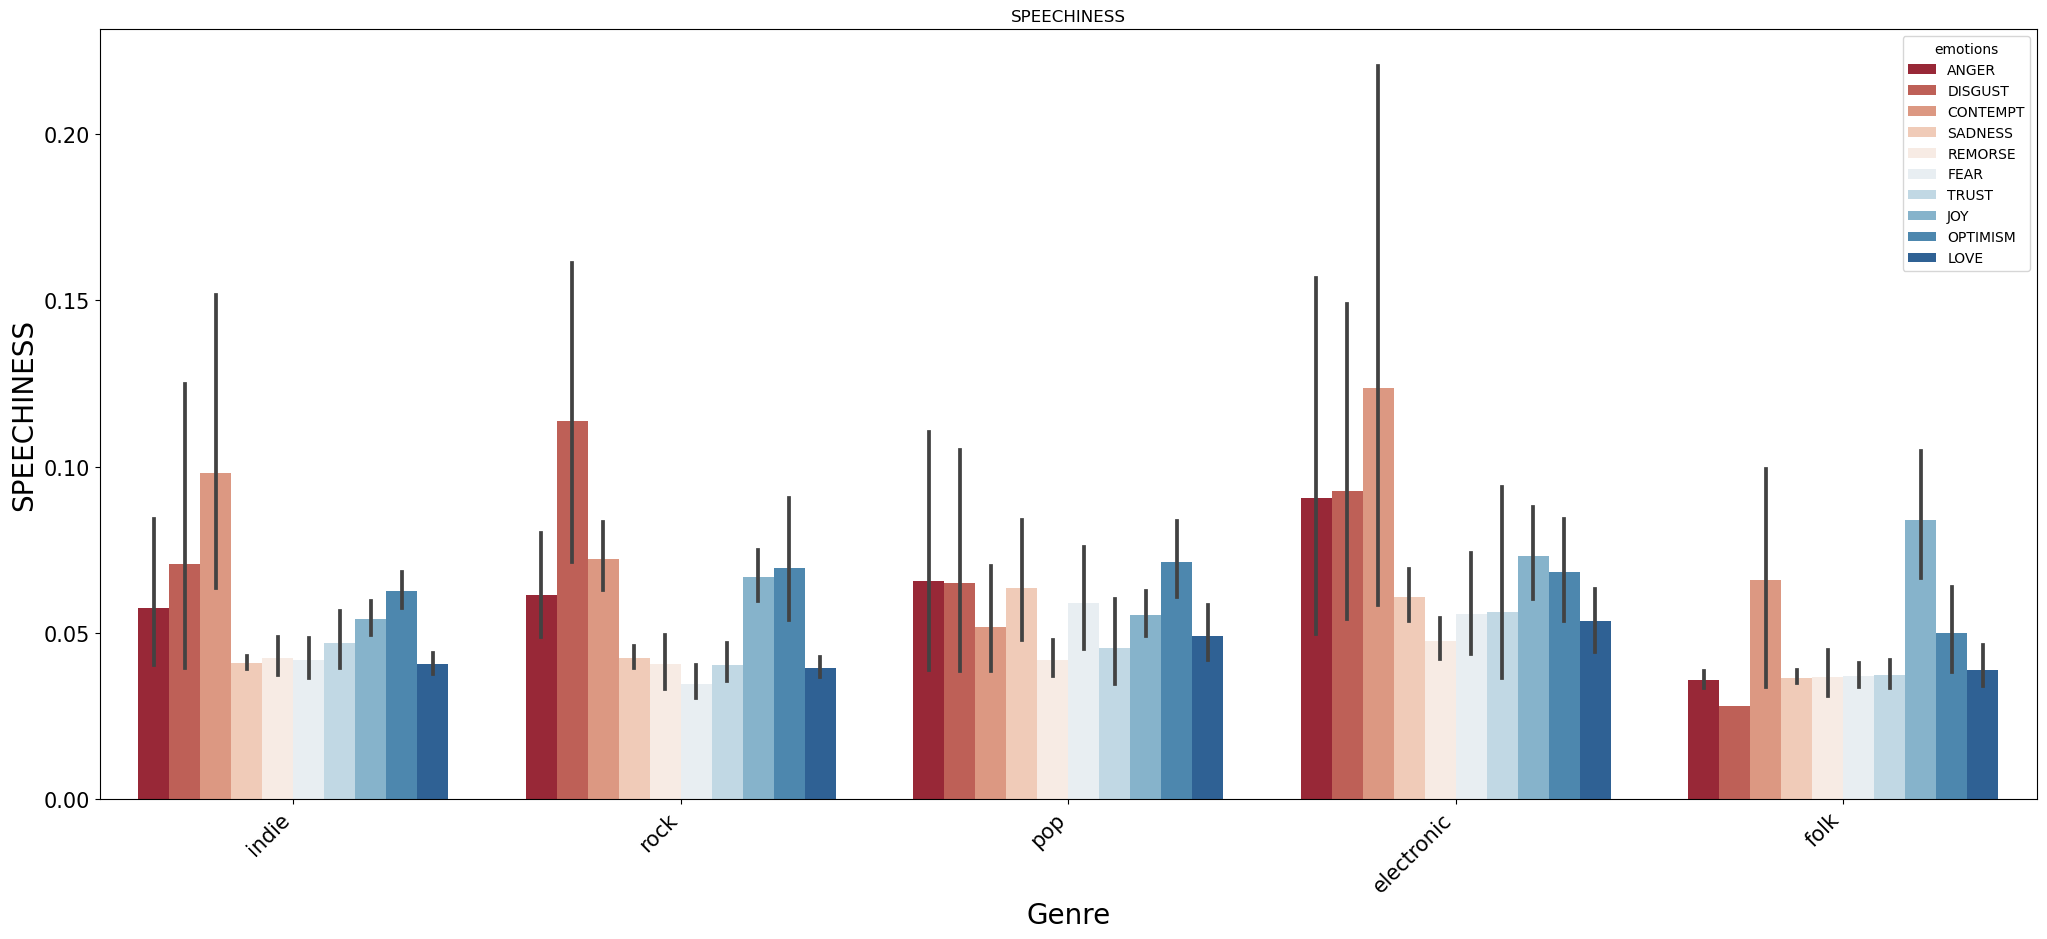

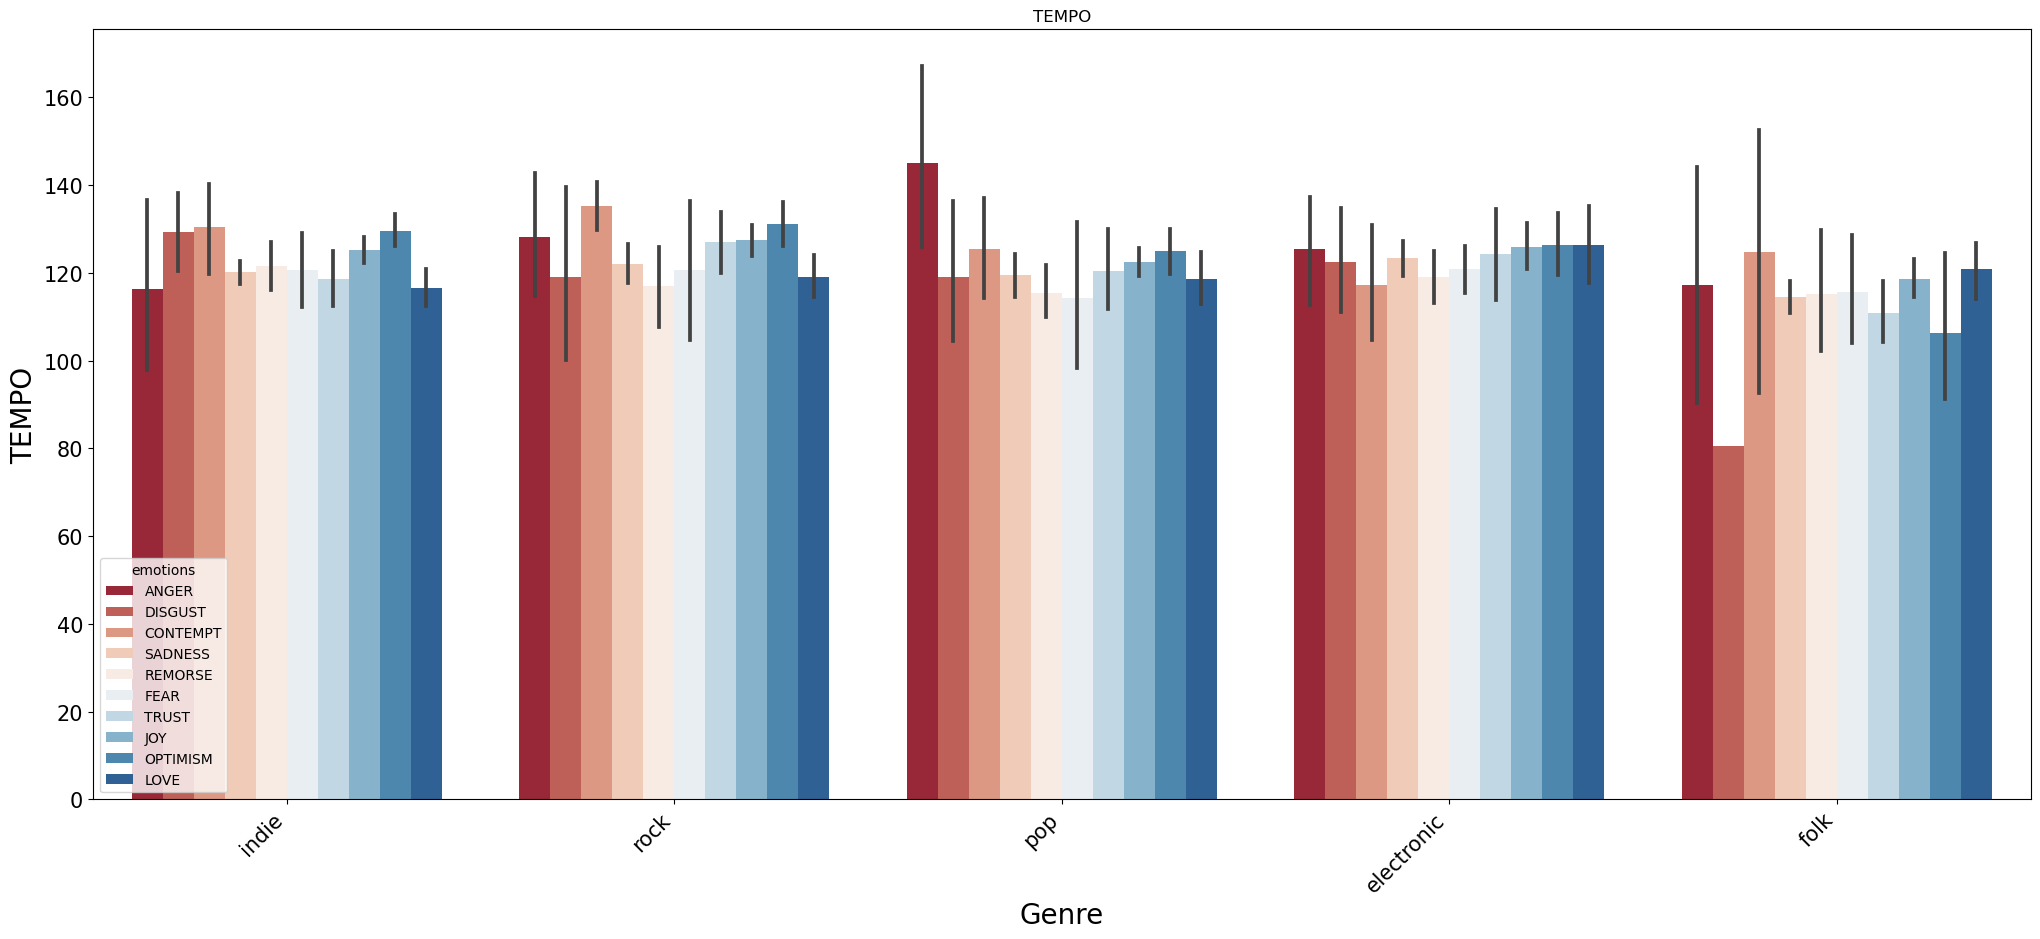

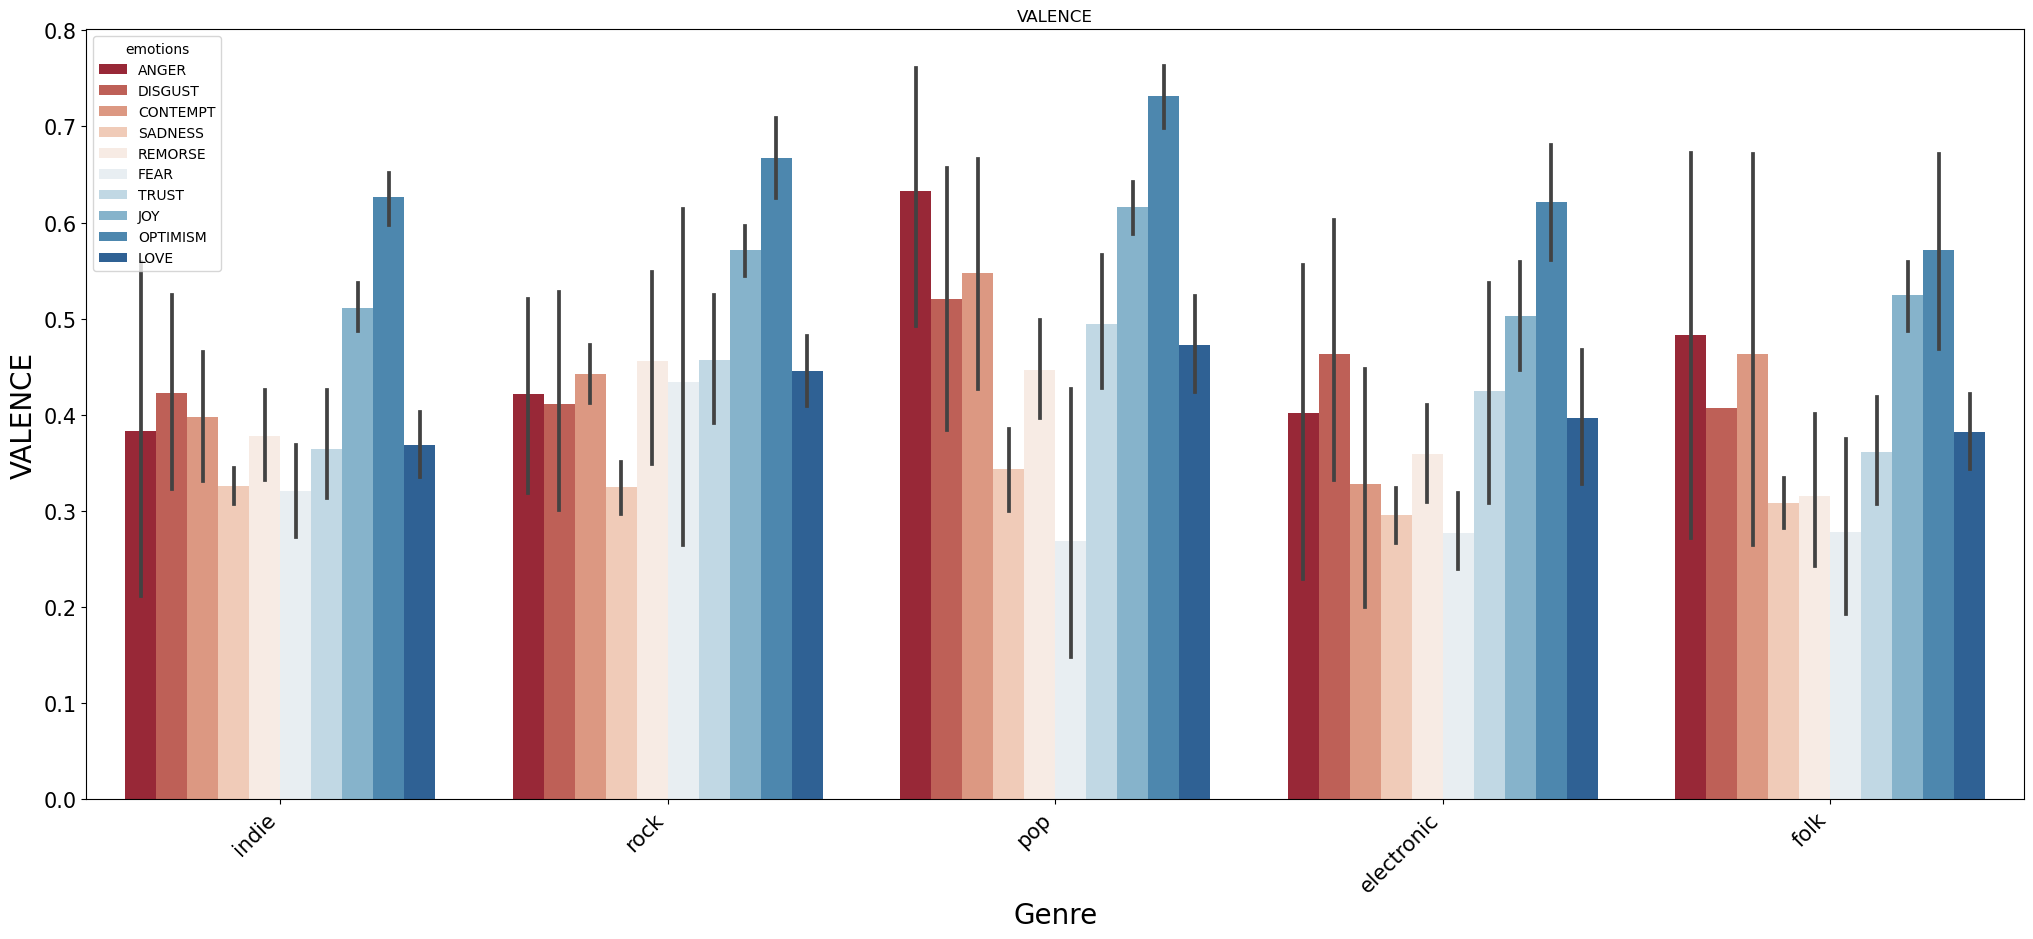

In [15]:
#plot barplot for each feature per genre and emotion
for feature in features:
    plt.figure(figsize = (25,10))
    sns.barplot(data=modified_tracks_emotion,x='genre',y=feature, hue='emotions', order=modified_tracks_emotion['genre'].value_counts().index, palette='RdBu')
    plt.xticks(rotation=45, ha='right', fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Genre', fontsize=20)
    plt.ylabel(feature.upper(), fontsize=20)
    plt.title(feature.upper())
    plt.show()